INFO: Loading burst configuration from: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/configs/bursts/wilhelm_dsa.yaml
INFO: Loading telescope configuration from: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/configs/bursts/../telescopes/dsa.yaml
INFO: Configurations successfully loaded and merged.
INFO: --- Starting Scintillation Pipeline for wilhelm ---
INFO: Noise modelling disabled by config.
INFO: Loading and processing raw data...
INFO: Loading DynamicSpectrum from file: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/data/wilhelm.npz
INFO: Initializing DynamicSpectrum object.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
--- Loaded Configuration ---
{
  "telescope_name": "DSA-110",
  "instrument_type": "Multi-Dish Interferometer",
  "native_channel_width_mhz": 0.03051757812,
  "total_bandwidth_mhz": 187.5,
  "num_channels": 6144,
  "min_freq_mhz": 1311.25,
  "max_freq_mhz": 1498.75,
  "burst_id": "wilhelm",
  "input_data_path": "/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/data/wilhelm.npz",
  "telescope": "dsa",
  "analysis": {
    "rfi_masking": {
      "find_burst_thres": 5.0,
      "padding_factor": 0.0,
      "use_symmetric_noise_window": true,
      "rfi_downsample_factor": 16,
      "enable_time_domain_flagging": false,
      "time_threshold_sigma": 7.0,
      "freq_threshold_sigma": 5.0
    },
    "acf": {
      "num_subbands": 2,
      "max_lag_mhz": 200.0,
      "use_snr_subbanding": false,
      "enable_intra_pulse_analysis": true,
      "intra_pulse_time_bins": 5
    

INFO: Spectrum shape: (6144, 2500)
INFO: Applying RFI masking.
INFO: Using time downsampling factor of 16 for RFI statistical checks.
INFO: Finding full signal envelope with S/N threshold > 5.0 (downsample ×8).
INFO: Full signal envelope found between bins 1248 and 1271.
INFO: Using symmetric noise window of duration 23 bins.
INFO: Using downsampled noise statistics from bins 76 to 78.
Iterative RFI Masking in Frequency Domain:  20%|██        | 1/5 [00:00<00:00, 72.91it/s]
INFO: Masked 5 channels based on frequency-domain stats.
INFO: Skipping time-domain RFI flagging as per configuration.
INFO: Initializing DynamicSpectrum object.
INFO: Spectrum shape: (6144, 2500)
INFO: Applying polynomial baseline subtraction...
INFO: Finding full signal envelope with S/N threshold > 5.0 (downsample ×8).
INFO: Full signal envelope found between bins 1248 and 1271.
INFO: Performing order-1 polynomial baseline subtraction using off-pulse spectrum.
INFO: Baseline subtraction complete.
INFO: Initializin

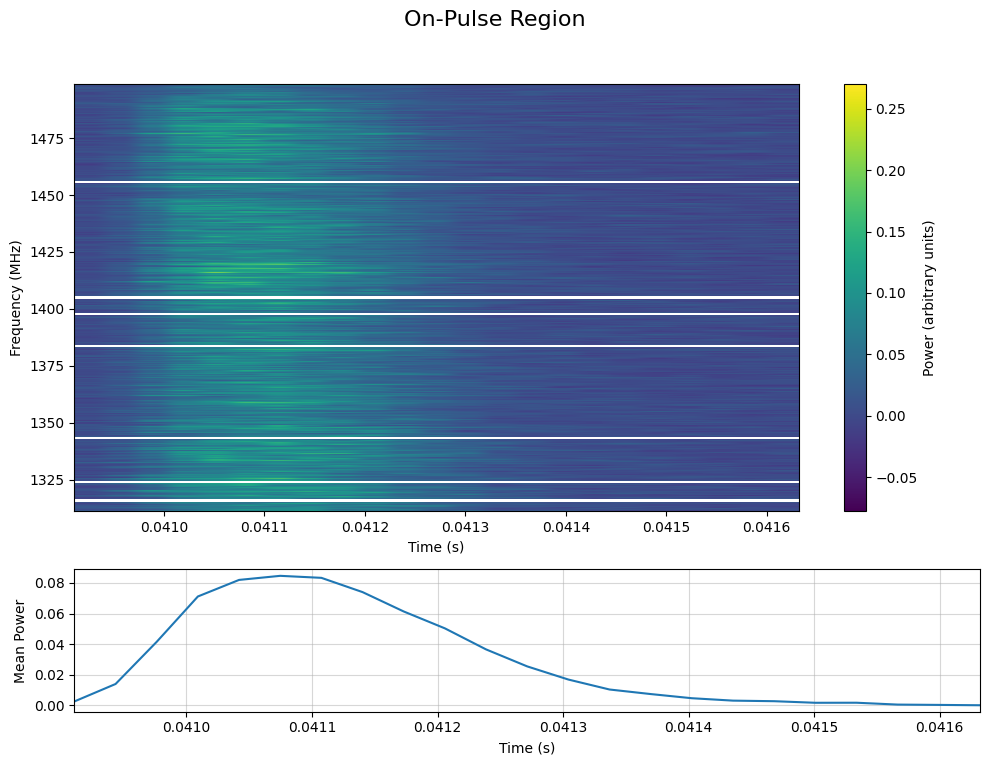

INFO: Initializing DynamicSpectrum object.
INFO: Spectrum shape: (6144, 1048)
INFO: Generating diagnostic plot: Off-Pulse (Noise) Region
INFO: Diagnostic plot saved to: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/plots/diagnostics/wilhelm_off_pulse_diagnostic.png


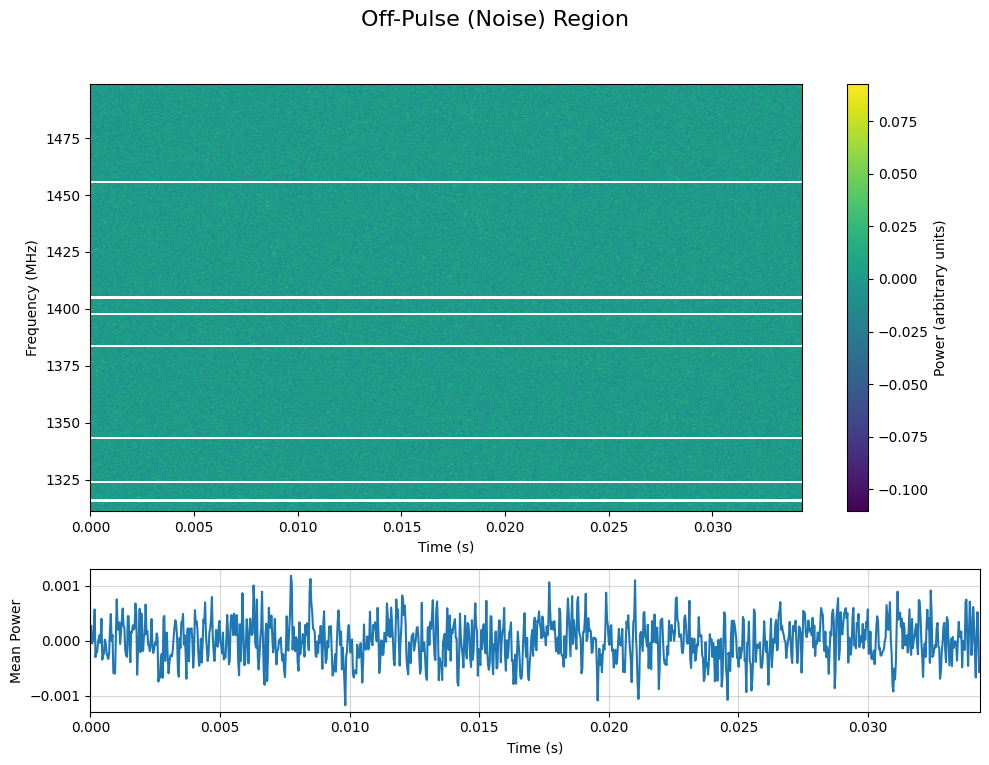

INFO: On/Off pulse diagnostic plots saved to: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/plots/diagnostics
INFO: Generating baseline fit diagnostic plot.
INFO: Generating baseline fit diagnostic plot.
INFO: Baseline diagnostic plot saved to: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/plots/diagnostics/wilhelm_baseline_diagnostic.png


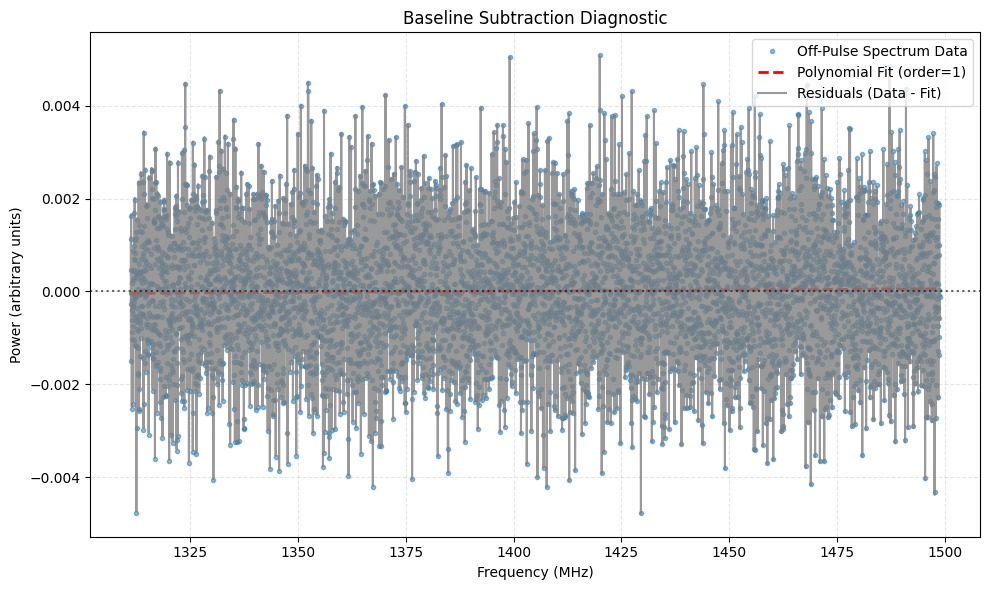

INFO: Characterizing off-pulse noise...
/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/scint_analysis/noise.py:145: UserWarning: NaNs detected – in‑painting with row/col medians.
  warnings.warn("NaNs detected – in‑painting with row/col medians.")
/opt/pysetup/.venv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
INFO: Noise characterization complete. Detected kind: 'flux_shiftedgamma'
INFO: Calculating ACFs for all sub-bands...
INFO: Starting sub‑band ACF calculations (self‑noise + synthetic‑noise aware).
ACF per sub‑band: 100%|██████████| 2/2 [00:00<00:00,  8.72it/s]
INFO: Running intra-pulse analysis...
INFO: Starting intra-pulse scintillation analysis...
Analyzing ACF vs. Time:   0%|          | 0/5 [00:00<?, ?it/s]/opt/pysetup/.venv/lib/python3.8/site-packages/uncertainties/core.py:1024: UserWarning: Using UFloat objects wit

--- Pipeline Execution Finished ---

--- Saving results to ./wilhelm_analysis_results.json ---

--- Generating Intra-Pulse Evolution Plot ---


/opt/pysetup/.venv/lib/python3.8/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
INFO: Intra-pulse evolution plot saved to: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/plots/diagnostics/wilhelm_intra_pulse_evolution.png


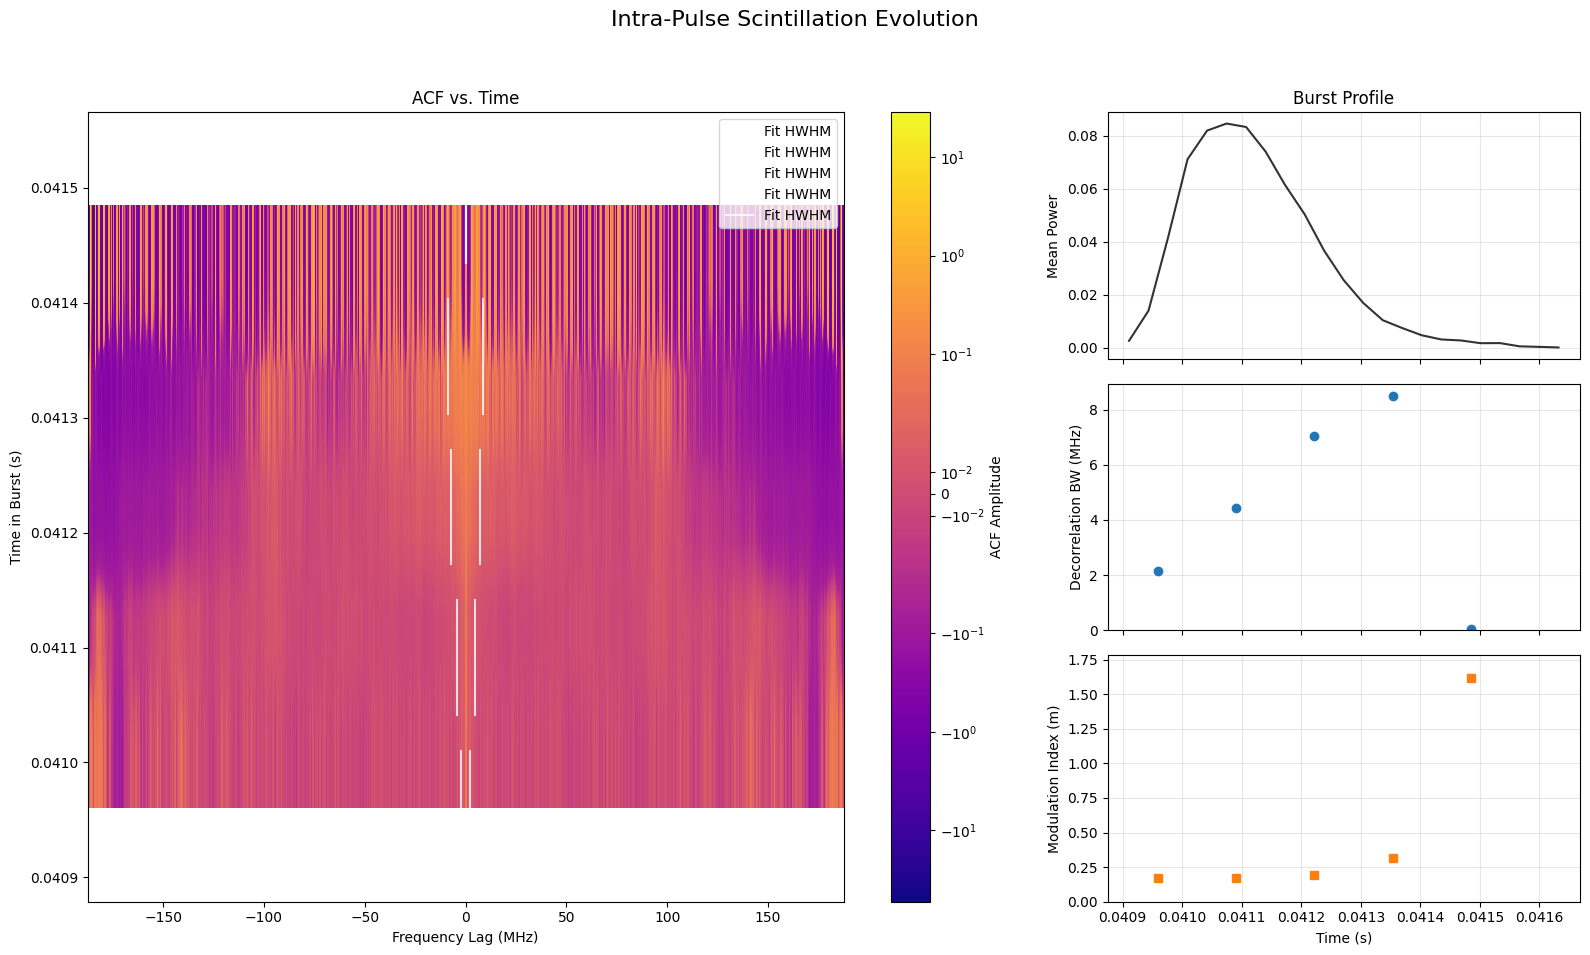

INFO: Generating full analysis overview plot.



--- Generating Final Analysis Plot ---
Saved plots to: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/plots/wilhelm_analysis_overview.png


INFO: Analysis overview plot saved to: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/plots/wilhelm_analysis_overview.png


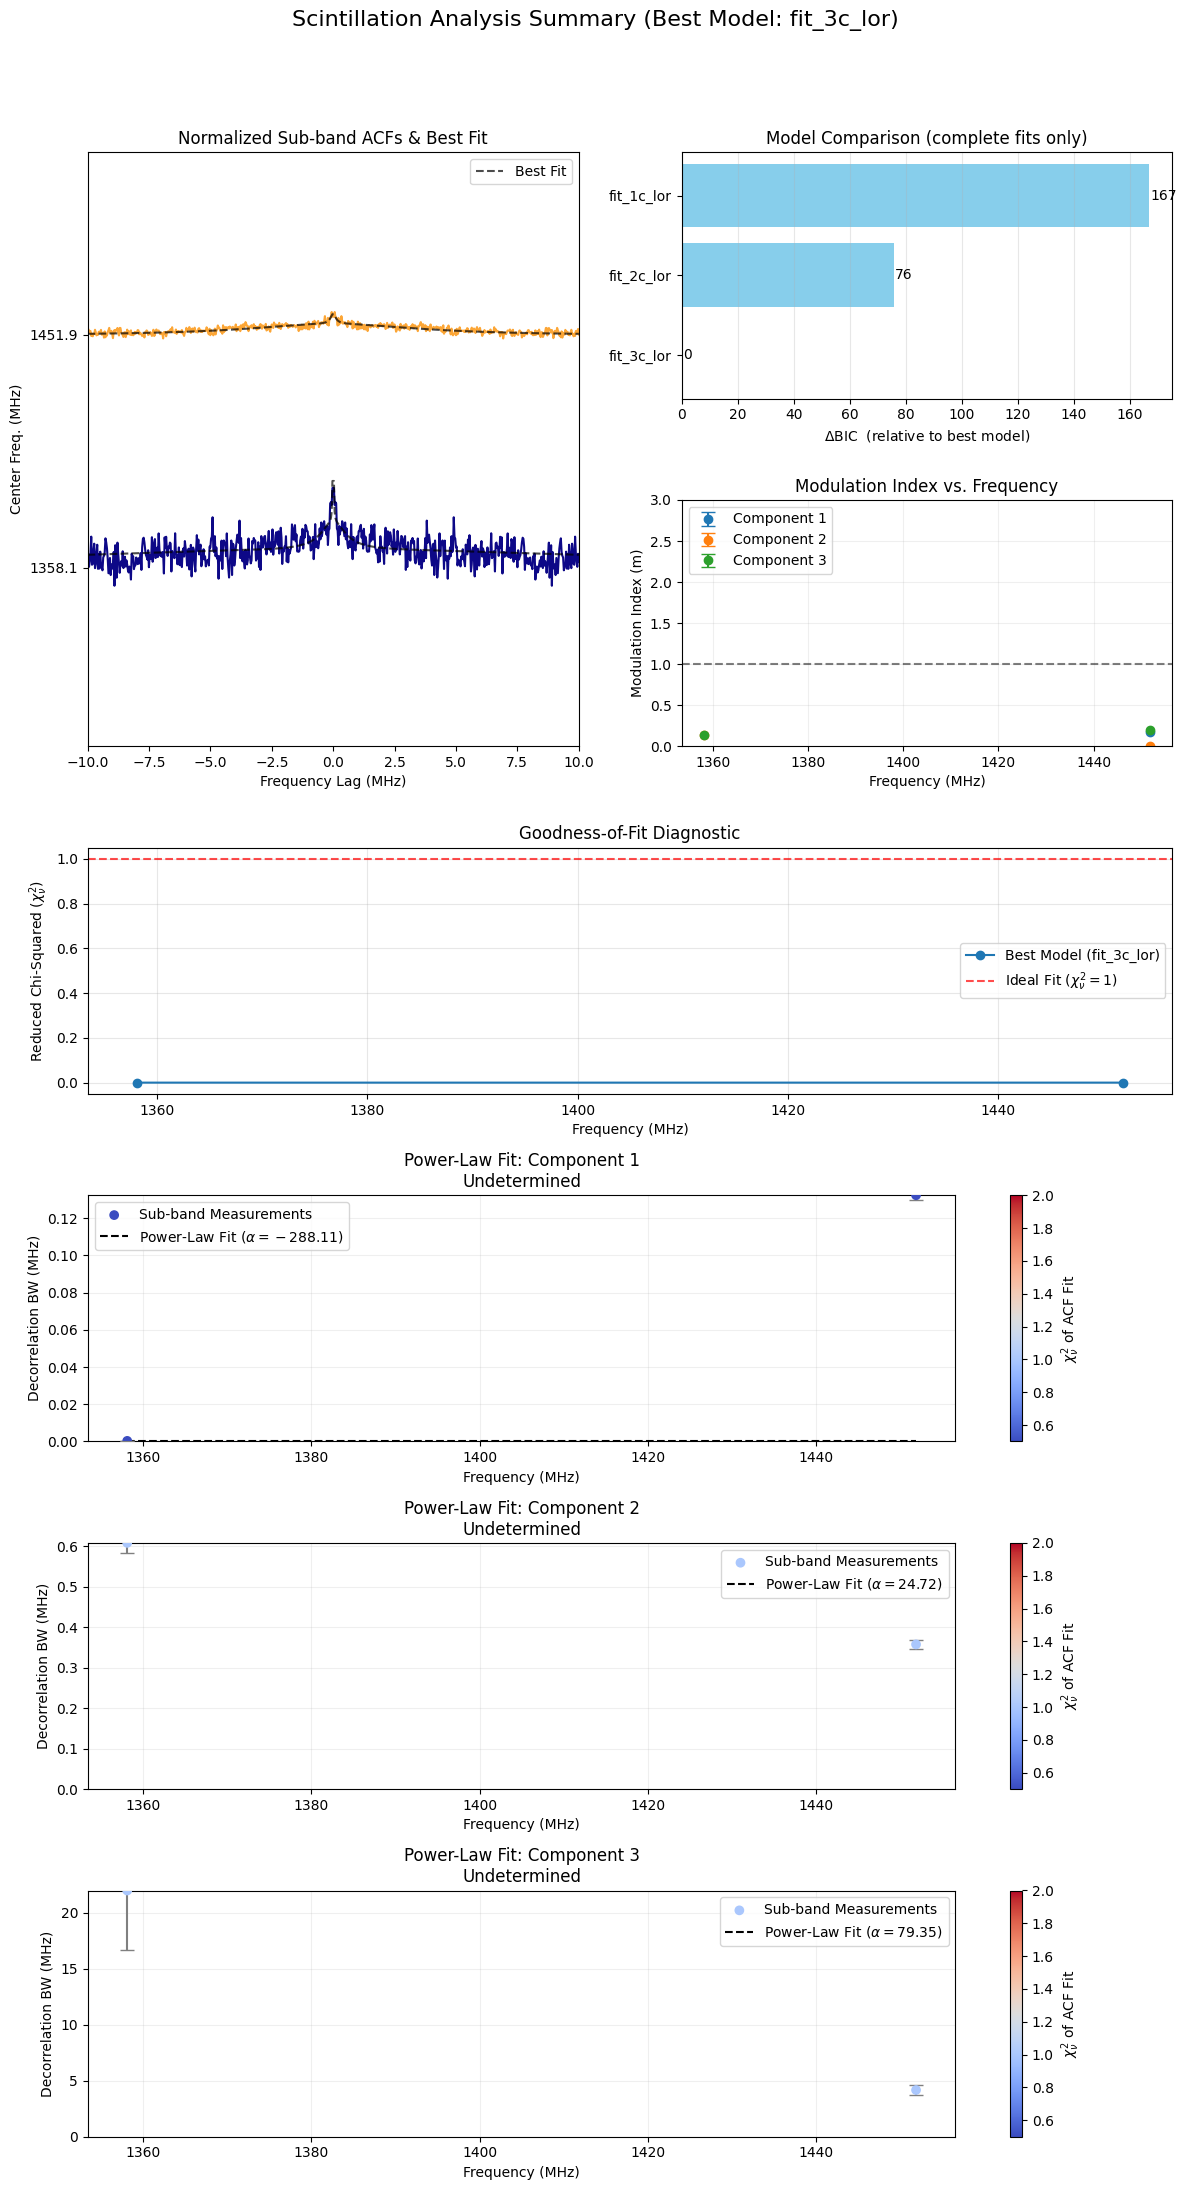

In [7]:
# Set path for module imports
import sys
# replace the path below with the absolute path to your `scattering/` folder
pkg_root = "/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation"
sys.path.insert(0, pkg_root)

%load_ext autoreload
%autoreload 2

import json
import logging
import numpy as np
import matplotlib.pyplot as plt


# Import the main pipeline components
from scint_analysis import config, pipeline, plotting
# Import your new noise model if you need to use it separately
# from scint_analysis import noise_model 

# --- 1. Configuration ---
# Set up basic logging to see pipeline output in the notebook
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')

# Define the path to the configuration file for the analysis run
BURST_CONFIG_PATH = '/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/configs/bursts/wilhelm_dsa.yaml'

# Load the merged configuration from the YAML files
try:
    analysis_config = config.load_config(BURST_CONFIG_PATH)
    print("--- Loaded Configuration ---")
    print(json.dumps(analysis_config, indent=2))
except Exception as e:
    logging.error(f"Failed to load configuration: {e}")
    # Stop execution if config fails
    raise

# --- 2. Initialize and Run the Pipeline ---
print("\n--- Initializing and Running Scintillation Pipeline ---")
# Create an instance of the main pipeline controller
scint_pipeline = pipeline.ScintillationAnalysis(analysis_config)

# This single .run() call executes all the steps in the correct order:
# - Loads and masks data
# - Characterizes off-pulse noise (NEW)
# - Calculates ACFs using the noise model for normalization
# - Fits all models and derives final parameters
scint_pipeline.run()
print("--- Pipeline Execution Finished ---")


# --- 3. Save and Plot Results ---
# Save the final parameters to a JSON file
if scint_pipeline.final_results:
    output_json_path = f"./{analysis_config.get('burst_id', 'output')}_analysis_results.json"
    
    print(f"\n--- Saving results to {output_json_path} ---")

    with open(output_json_path, 'w') as f:
        json.dump(scint_pipeline.final_results, f, indent=4)
        
    logging.info(f"Final results saved to {output_json_path}")

# Generate Intra-Pulse Evolution Plot
print("\n--- Generating Intra-Pulse Evolution Plot ---")

# Check if the intra-pulse analysis was run and produced results
if scint_pipeline.intra_pulse_results:
    # We need the on-pulse time series for context in the plot.
    # First, get the dynamic spectrum object from the pipeline.
    spectrum = scint_pipeline.masked_spectrum
    
    # Recalculate the burst limits to ensure we have the correct window
    # (This uses the same config parameters as the pipeline run)
    rfi_config = analysis_config.get('analysis', {}).get('rfi_masking', {})
    burst_lims = spectrum.find_burst_envelope(
        thres=rfi_config.get('find_burst_thres', 5.0),
        padding_factor=rfi_config.get('padding_factor', 2.0)
    )

    # Get the on-pulse profile and its corresponding time axis
    on_pulse_profile = spectrum.get_profile(time_window_bins=burst_lims)
    on_pulse_times = spectrum.times[burst_lims[0]:burst_lims[1]]

    # Define a path to save the new plot
    plot_options = analysis_config.get('pipeline_options', {}).get('diagnostic_plots', {})
    if plot_options.get('enable', False):
        plot_dir = plot_options.get('directory', './plots/diagnostics')
        burst_id = analysis_config.get('burst_id', 'unknown_burst')
        save_path = f"{plot_dir}/{burst_id}_intra_pulse_evolution.png"
    else:
        save_path = None

    # Call the new plotting function with the results from the pipeline
    plotting.plot_intra_pulse_evolution(
        intra_pulse_results=scint_pipeline.intra_pulse_results,
        on_pulse_profile=on_pulse_profile,
        on_pulse_times=on_pulse_times,
        save_path=save_path
    )
else:
    logging.warning("Intra-pulse analysis was not enabled in the config or produced no results. Skipping evolution plot.")

    
# Generate the final overview plot using the results stored in the pipeline object
print("\n--- Generating Final Analysis Plot ---")
if scint_pipeline.final_results and scint_pipeline.all_subband_fits:
    # Get the plot save path from the config, as we implemented
    save_path = analysis_config.get('pipeline_options', {}).get('output_plot_path')
    print(f'Saved plots to: {save_path}')
    
    plotting.plot_analysis_overview(
        analysis_results=scint_pipeline.final_results,
        acf_results=scint_pipeline.acf_results,
        all_subband_fits=scint_pipeline.all_subband_fits,
        all_powerlaw_fits=scint_pipeline.all_powerlaw_fits,
        save_path=save_path
    )
else:
    logging.warning("Pipeline did not produce final results, skipping plot.")

In [ ]:
import json
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import RealData, ODR, Model as ODRModel
from scipy.stats import expon, norm, rice
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
import logging

npz = np.load('/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/data/wilhelm.npz')
data = npz['power_2d']

data_bpc = np.zeros_like(data)
for i in range(6144):
    chmean = np.nanmean(data[i, :1000])
    chstd = np.nanstd(data[i, :1000])
    data_bpc[i, :] = data[i,:]-chmean
    data_bpc[i, :] /= chstd
data_bpc = np.nan_to_num(data_bpc, nan=0.0, posinf=0.0, neginf=0.0)

fig = plt.figure(figsize=(4,3))
time = np.linspace(0,data.shape[1]*32.768e-3,data.shape[1])
time_lim = time[1248:1264]
timeseries = np.nansum(data,axis=0)
timeseries_lim = timeseries[1248:1264]
plt.plot(time,timeseries,c='k')
plt.plot(time_lim,timeseries_lim,c='r',alpha=0.5,linewidth=5)
plt.xlabel('Time (ms)')
plt.ylabel('Intensity (a.u.)')
plt.xlim(40,42.5)
plt.title('Wilhelm (DSA)')
plt.show()

In [ ]:
import json
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import RealData, ODR, Model as ODRModel
from scipy.stats import expon, norm, rice
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
import logging
    
def plot_spectrum_and_histograms(freqs, spectrum_on, spectrum_off, num_subbands=4, title="Intensity Distribution Analysis"):
    """
    Creates a multi-panel plot showing spectra and fitted intensity histograms.
    This version fits the decaying tail of the signal histogram for a better visual fit.
    """
    logging.info(f"Generating spectrum and histogram plot: {title}")
    
    # Define the models to fit directly to the histogram data
    def gaussian_func(x, amplitude, mu, sigma):
        return amplitude * np.exp(-((x - mu)**2) / (2 * sigma**2))

    def exponential_func(x, amplitude, scale, loc):
        x_masked = np.copy(x)
        x_masked[x_masked < loc] = loc
        return amplitude * np.exp(-(x_masked - loc) / scale)

    fig, axes = plt.subplots(num_subbands, 2, figsize=(25, 15), width_ratios=[1, 0.2])
    fig.suptitle(title, fontsize=20, y=1.)
    
    chunks = np.linspace(0, len(freqs), num_subbands + 1, dtype=int)

    for i in range(num_subbands):
        lo, hi = chunks[i], chunks[i+1]
        ax_spec = axes[i, 0]
        ax_hist = axes[i, 1]

        # Get data chunks and remove NaNs for robust statistics and fitting
        spec_on_chunk = spectrum_on[lo:hi][np.isfinite(spectrum_on[lo:hi])]
        spec_off_chunk = spectrum_off[lo:hi][np.isfinite(spectrum_off[lo:hi])]
        freq_chunk = freqs[lo:hi]

        # Plot Spectra (Left Column)
        offset = np.std(spec_on_chunk) * 4 if len(spec_on_chunk) > 0 else 1.0
        ax_spec.step(freq_chunk, spectrum_on[lo:hi], color='k', label='On-Pulse (Signal)')
        ax_spec.step(freq_chunk, spectrum_off[lo:hi] - offset, color='m', alpha=0.7, label='Off-Pulse (Noise)')
        ax_spec.axhline(0, linestyle='dotted', color='k', alpha=0.5)
        ax_spec.axhline(-offset, linestyle='dotted', color='m', alpha=0.5)

        ax_spec.set_xlim(freq_chunk.min(), freq_chunk.max())
        spec_min = np.min(spectrum_off[lo:hi] - offset) if len(spec_off_chunk) > 0 else -1
        spec_max = np.max(spectrum_on[lo:hi]) if len(spec_on_chunk) > 0 else 1
        ax_spec.set_ylim(spec_min * 1.1, spec_max * 1.3)
        ax_spec.set_ylabel('Intensity', fontsize=17)
        ax_spec.legend(loc='upper right', frameon=False, fontsize=17)
        if i < num_subbands - 1:
            ax_spec.set_xticklabels([])

        # Plot Histograms and Fits (Right Column)
        counts_on, bin_edges_on, _ = ax_hist.hist(spec_on_chunk, bins=50, histtype='step', color='k', linewidth=2, label='Signal')
        bin_centers_on = (bin_edges_on[:-1] + bin_edges_on[1:]) / 2
        
        counts_off, bin_edges_off, _ = ax_hist.hist(spec_off_chunk, bins=50, histtype='step', color='m', linewidth=2, linestyle='--', label='Noise')
        bin_centers_off = (bin_edges_off[:-1] + bin_edges_off[1:]) / 2
        
        # Create a smooth x-axis for plotting the fit curves
        x_fit_min = np.min(bin_edges_off) if len(bin_edges_off) > 1 else 0
        x_fit_max = np.max(bin_edges_on) if len(bin_edges_on) > 1 else 1
        x_fit = np.linspace(x_fit_min, x_fit_max, 200)

        # Fit Exponential to the TAIL of the Signal Histogram
        if len(spec_on_chunk) > 10:
            try:
                # Find the peak of the histogram to define the start of the tail
                peak_index = np.argmax(counts_on)
                
                # Select data to the right of the peak
                tail_centers = bin_centers_on[peak_index:]
                tail_counts = counts_on[peak_index:]
                
                # Only fit if there are enough points in the tail
                if len(tail_centers) > 3:
                    p0_exp = [tail_counts[0], np.std(spec_on_chunk), tail_centers[0]]
                    popt_exp, _ = curve_fit(exponential_func, tail_centers, tail_counts, p0=p0_exp, maxfev=8000)
                    print(f'Popt: {popt_exp}')
                    ax_hist.plot(x_fit, exponential_func(x_fit, *popt_exp), 'g-.', lw=2, label=f'Exp. Fit (scale={popt_exp[1]:.2f})')
                else:
                    logging.warning(f"Not enough data points in tail to fit exponential for sub-band {i+1}")
            except (RuntimeError, IndexError) as e:
                logging.warning(f"Could not fit exponential to signal in sub-band {i+1}: {e}")

        # Fit Gaussian to Noise Histogram (no change needed here)
        if len(spec_off_chunk) > 10:
            try:
                p0_gauss = [np.max(counts_off), np.mean(spec_off_chunk), np.std(spec_off_chunk)]
                popt_gauss, _ = curve_fit(gaussian_func, bin_centers_off, counts_off, p0=p0_gauss, maxfev=8000)
                ax_hist.plot(x_fit, gaussian_func(x_fit, *popt_gauss), 'r:', lw=3, label=f'Gauss. Fit ($\sigma$={abs(popt_gauss[2]):.2f})')
            except RuntimeError as e:
                logging.warning(f"Could not fit gaussian to noise in sub-band {i+1}: {e}")

        if i < num_subbands - 1:
            ax_hist.set_xticklabels([])
            
        ax_hist.set_yscale('log')
        ax_hist.set_ylim(0.5, max(popt_gauss[0], popt_exp[0])*1.245)
        ax_hist.legend(frameon=False, fontsize=17, bbox_to_anchor=(1.85, 0.5, 0.5, 0.5))

    axes[-1, 0].set_xlabel('Frequency (MHz)', fontsize=17)
    axes[-1, 1].set_xlabel('Intensity (Counts)', fontsize=17)
    
    for ax_row in axes:
        ax_row[1].set_ylabel("Counts")
        ax_row[1].yaxis.set_label_position("right")
        ax_row[1].yaxis.tick_right()
        
    for subax in axes.flatten():
        subax.title.set_fontsize(17)
        subax.xaxis.label.set_fontsize(17)
        subax.yaxis.label.set_fontsize(17)
        subax.tick_params(axis='both', labelsize=17)

    fig.tight_layout() #rect=[0, 0, 1, 0.96])
    plt.show()

Chunks: [   0 1536 3072 4608 6144]
Popt: [92.00000005 13.74850697 19.62680718]
Popt: [106.40634718  14.11047461  21.89932556]
Popt: [103.02622885  12.83502029  20.68804342]
Popt: [117.5         14.56573502  24.73570577]


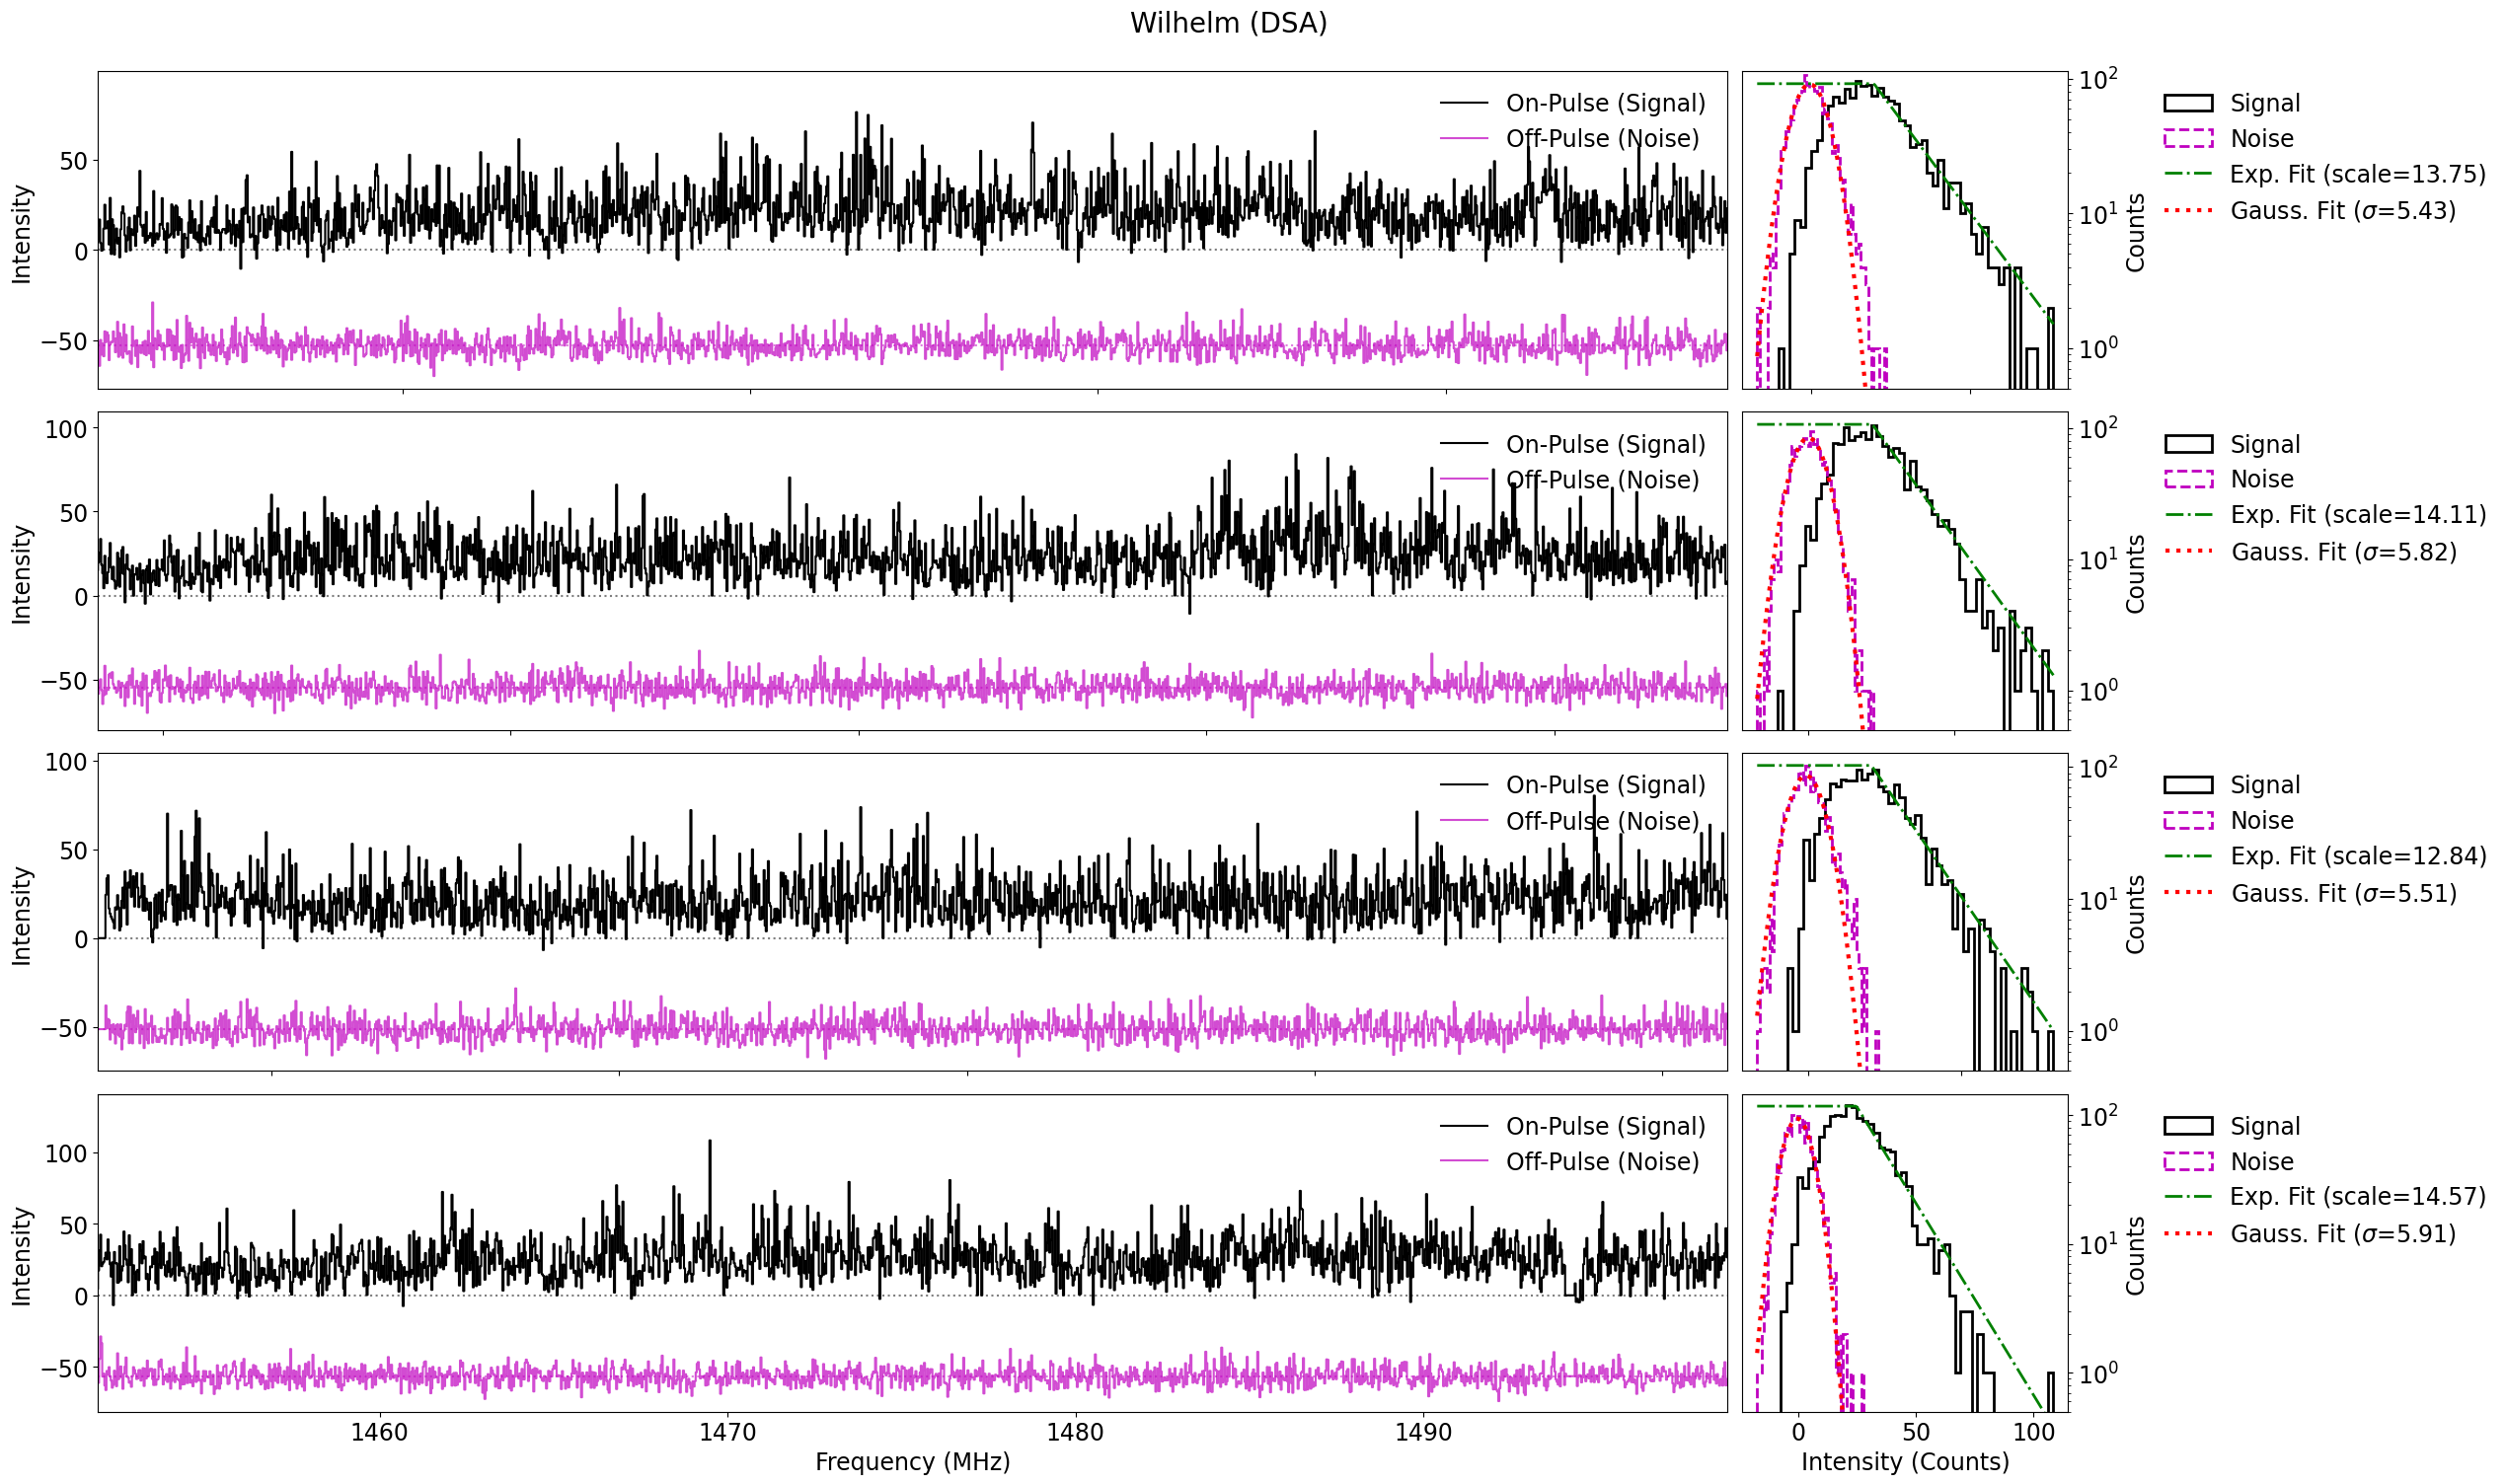

In [119]:
freqs = np.linspace(1311.25, 1498.75, 6144)
chunks = np.linspace(0, 6144, 5, dtype=int)
print(f'Chunks: {chunks}')

on_0=1248
on_1=1264
spectrum_on = np.nansum(data_bpc[:, on_0:on_1],axis=1)

off_0=1214
off_1=1230
spectrum_off = np.nansum(data_bpc[:, off_0:off_1],axis=1)

plot_spectrum_and_histograms(freqs, spectrum_on, spectrum_off, num_subbands=4, title="Wilhelm (DSA)")

#plot_spectrum_and_histograms_rice(freqs, spectrum_on, spectrum_off, num_subbands=4, title="Intensity Distribution Analysis")

In [ ]:
import json
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import RealData, ODR, Model as ODRModel
from scipy.stats import expon, norm, rice
from scipy.optimize import curve_fit
import logging

# Set up basic logging to see the output
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')

def read_json_data(json_path):
    """
    Reads scintillation data from a pipeline-generated JSON file.

    Args:
        json_path (str): The path to the input JSON file.

    Returns:
        tuple: A tuple containing arrays for frequencies (MHz), bandwidths (MHz),
               bandwidth errors (MHz), modulation indices, and modulation index errors.
               Returns (None, None, None, None, None) if an error occurs.
    """
    logging.info(f"Reading data from JSON file: {json_path}")
    try:
        with open(json_path, 'r') as f:
            data = json.load(f)

        measurements = data['components']['scint_scale']['subband_measurements']
        freqs = np.array([m['freq_mhz'] for m in measurements])
        bws = np.array([m['bw'] for m in measurements])
        mods = np.array([m['mod'] for m in measurements])
        bw_err_fit = np.nan_to_num(np.array([m.get('bw_err') for m in measurements]))
        bw_err_finite = np.nan_to_num(np.array([m.get('finite_err') for m in measurements]))
        bw_errs = np.sqrt(bw_err_fit**2 + bw_err_finite**2)
        mod_errs = np.nan_to_num(np.array([m.get('mod_err') for m in measurements]))
        return freqs, bws, bw_errs, mods, mod_errs
    except (FileNotFoundError, KeyError, TypeError) as e:
        logging.error(f"Could not read or parse JSON file {json_path}. Error: {e}")
        return None, None, None, None, None

def read_pkl_data(pkl_path, model_key='1_lorenz'):
    """
    Reads scintillation data from a pickle file containing analysis results.
    """
    logging.info(f"Reading data from pickle file: {pkl_path}")
    try:
        with open(pkl_path, 'rb') as f:
            data = pickle.load(f)
        if model_key not in data:
            logging.error(f"Model key '{model_key}' not found in pickle file.")
            return None, None, None, None, None
        freqs = np.array(data['f_cents'])
        if model_key == '1_lorenz':
            bws = np.array(data[model_key]['sub_scint_1'])
            mods = np.array(data[model_key]['mods1'])
            bw_err_fit = np.nan_to_num(np.array(data[model_key]['sub_scint_uncert_1']))
            mod_errs = np.nan_to_num(np.array(data[model_key]['mods1_uncert']))
            bw_err_add = np.array([np.mean(err) for err in data[model_key]['add_un1']])
            bw_errs = np.sqrt(bw_err_fit**2 + bw_err_add**2)
        elif model_key == '2_lorenz':
            bws = np.array(data[model_key]['sub_scint_2'])
            mods = np.array(data[model_key]['mods2'])
            bw_err_fit = np.nan_to_num(np.array(data[model_key]['sub_scint_uncert_2']))
            mod_errs = np.nan_to_num(np.array(data[model_key]['mods2_uncert']))
            bw_err_add = np.array([np.mean(err) for err in data[model_key]['add_un2']])
            bw_errs = np.sqrt(bw_err_fit**2 + bw_err_add**2)
        else:
             raise ValueError(f"Unsupported model key: {model_key}")
        return freqs, bws, bw_errs, mods, mod_errs
    except (FileNotFoundError, KeyError, TypeError, pickle.UnpicklingError) as e:
        logging.error(f"Could not read or parse pickle file {pkl_path}. Error: {e}")
        return None, None, None, None, None

def fit_power_law(freqs, values, errors):
    """
    Fits a power-law relationship y = c * x^alpha using ODR in log-space.
    """
    valid_mask = (freqs > 0) & (values > 0) & (errors > 0)
    if np.sum(valid_mask) < 2:
        logging.warning("Not enough valid data points to perform a power-law fit.")
        return None
    log_freqs = np.log10(freqs[valid_mask])
    log_values = np.log10(values[valid_mask])
    log_errors = errors[valid_mask] / (values[valid_mask] * np.log(10))
    def linear_func(beta, x):
        return beta[0] * x + beta[1]
    linear_model = ODRModel(linear_func)
    data = RealData(log_freqs, log_values, sy=log_errors)
    odr = ODR(data, linear_model, beta0=[4.0, 1.0])
    output = odr.run()
    if output.info > 0:
        logging.info("ODR fit completed successfully.")
    else:
        logging.warning(f"ODR fit may have failed with status: {output.info}")
    return output

def plot_spectrum_and_histograms(freqs, spectrum_on, spectrum_off, num_subbands=4, title="Intensity Distribution Analysis"):
    """
    Creates a multi-panel plot showing spectra and fitted intensity histograms.
    This version uses a chained fit: first an exponential fit to the tail, then
    a Rice fit to the whole distribution using the exponential fit for initial guesses.
    """
    logging.info(f"Generating spectrum and histogram plot: {title}")
    
    # Define the models to fit directly to the histogram data
    def gaussian_func(x, amplitude, mu, sigma):
        return amplitude * np.exp(-((x - mu)**2) / (2 * sigma**2))

    def exponential_func(x, amplitude, scale, loc):
        x_masked = np.copy(x)
        x_masked[x_masked < loc] = loc
        return amplitude * np.exp(-(x_masked - loc) / scale)

    def rice_func(x, amplitude, b, loc, scale):
        return amplitude * rice.pdf(x, b, loc=loc, scale=scale)

    fig, axes = plt.subplots(num_subbands, 2, figsize=(25, 15), width_ratios=[1, 0.2])
    fig.suptitle(title, fontsize=20)
    
    chunks = np.linspace(0, len(freqs), num_subbands + 1, dtype=int)

    for i in range(num_subbands):
        lo, hi = chunks[i], chunks[i+1]
        ax_spec = axes[i, 0]
        ax_hist = axes[i, 1]

        # Get data chunks and remove NaNs for robust statistics and fitting
        spec_on_chunk = spectrum_on[lo:hi][np.isfinite(spectrum_on[lo:hi])]
        spec_off_chunk = spectrum_off[lo:hi][np.isfinite(spectrum_off[lo:hi])]
        freq_chunk = freqs[lo:hi]

        # Plot Spectra (Left Column)
        offset = np.std(spec_on_chunk) * 4 if len(spec_on_chunk) > 0 else 1.0
        ax_spec.step(freq_chunk, spectrum_on[lo:hi], color='k', label='On-Pulse (Signal)')
        ax_spec.step(freq_chunk, spectrum_off[lo:hi] - offset, color='m', alpha=0.7, label='Off-Pulse (Noise)')
        ax_spec.axhline(0, linestyle='dotted', color='k', alpha=0.5)
        ax_spec.axhline(-offset, linestyle='dotted', color='m', alpha=0.5)

        ax_spec.set_xlim(freq_chunk.min(), freq_chunk.max())
        spec_min = np.min(spectrum_off[lo:hi] - offset) if len(spec_off_chunk) > 0 else -1
        spec_max = np.max(spectrum_on[lo:hi]) if len(spec_on_chunk) > 0 else 1
        ax_spec.set_ylim(spec_min * 1.1, spec_max * 1.1)
        ax_spec.set_ylabel('Intensity')
        ax_spec.legend(loc='upper right', frameon=False)
        if i < num_subbands - 1:
            ax_spec.set_xticklabels([])

        # Plot Histograms and Fits (Right Column)
        counts_on, bin_edges_on, _ = ax_hist.hist(spec_on_chunk, bins=50, histtype='step', color='k', linewidth=2, label='Signal')
        bin_centers_on = (bin_edges_on[:-1] + bin_edges_on[1:]) / 2
        
        counts_off, bin_edges_off, _ = ax_hist.hist(spec_off_chunk, bins=50, histtype='step', color='m', linewidth=2, linestyle='--', label='Noise')
        bin_centers_off = (bin_edges_off[:-1] + bin_edges_off[1:]) / 2
        
        x_fit_min = min(bin_edges_off.min(), bin_edges_on.min()) if len(bin_edges_off)>0 and len(bin_edges_on)>0 else 0
        x_fit_max = max(bin_edges_off.max(), bin_edges_on.max()) if len(bin_edges_off)>0 and len(bin_edges_on)>0 else 1
        x_fit = np.linspace(x_fit_min, x_fit_max, 200)

        # --- Chained Fit for Signal ---
        popt_exp = None
        if len(spec_on_chunk) > 10:
            # Stage 1: Fit Exponential to the TAIL to get good initial guesses
            try:
                peak_index = np.argmax(counts_on)
                tail_centers = bin_centers_on[peak_index:]
                tail_counts = counts_on[peak_index:]
                if len(tail_centers) > 3:
                    p0_exp = [tail_counts[0], np.std(spec_on_chunk), tail_centers[0]]
                    popt_exp, _ = curve_fit(exponential_func, tail_centers, tail_counts, p0=p0_exp, maxfev=8000)
                    ax_hist.plot(x_fit, exponential_func(x_fit, *popt_exp), 'b:', lw=2, label=f'Exp. Tail Fit')
            except (RuntimeError, IndexError) as e:
                logging.warning(f"Could not perform initial exponential tail fit in sub-band {i+1}: {e}")

            # Stage 2: Fit Rice distribution using guesses from the exponential fit
            try:
                if popt_exp is not None:
                    # Use the robust results from the tail fit as initial guesses
                    p0_rice = [popt_exp[0], 0.1, popt_exp[2], popt_exp[1]] # p0 for [amp, b, loc, scale]
                else:
                    # Fallback to general initial guesses if the tail fit failed
                    p0_rice = [np.max(counts_on), np.mean(spec_on_chunk), np.min(spec_on_chunk), np.std(spec_on_chunk)]
                
                lower_bounds = [0, 0, spec_on_chunk.min() - spec_on_chunk.std(), 1e-9]
                upper_bounds = [2 * np.max(counts_on), 2 * spec_on_chunk.max(), spec_on_chunk.max(), 2 * spec_on_chunk.std()]
                bounds = (lower_bounds, upper_bounds)

                popt_rice, _ = curve_fit(rice_func, bin_centers_on, counts_on, p0=p0_rice, bounds=bounds, maxfev=8000)
                
                b_fit, scale_fit = popt_rice[1], popt_rice[3]
                regime_ratio = b_fit / scale_fit if scale_fit > 1e-9 else np.inf
                fit_label = f'Rice Fit (b/scale={regime_ratio:.2f})'
                ax_hist.plot(x_fit, rice_func(x_fit, *popt_rice), 'g-.', lw=3, label=fit_label)
            except (RuntimeError, ValueError) as e:
                logging.warning(f"Could not fit Rice distribution to signal in sub-band {i+1}: {e}")

        # Fit Gaussian to Noise Histogram
        if len(spec_off_chunk) > 10:
            try:
                p0_gauss = [np.max(counts_off), np.mean(spec_off_chunk), np.std(spec_off_chunk)]
                popt_gauss, _ = curve_fit(gaussian_func, bin_centers_off, counts_off, p0=p0_gauss, maxfev=8000)
                ax_hist.plot(x_fit, gaussian_func(x_fit, *popt_gauss), 'r:', lw=3, label=f'Gauss. Fit ($\sigma$={abs(popt_gauss[2]):.2f})')
            except RuntimeError as e:
                logging.warning(f"Could not fit gaussian to noise in sub-band {i+1}: {e}")

        ax_hist.set_yscale('log')
        ax_hist.set_ylim(bottom=0.5)
        ax_hist.legend(frameon=False, fontsize='small')

    axes[-1, 0].set_xlabel('Frequency (MHz)')
    axes[-1, 1].set_xlabel('Intensity (Counts)')
    
    for ax_row in axes:
        ax_row[1].set_ylabel("Counts")
        ax_row[1].yaxis.set_label_position("right")
        ax_row[1].yaxis.tick_right()

    fig.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

def analyze_and_plot_combined_data(json_path, pkl_path):
    """
    Main function to load data, perform fits, and generate plots.
    """
    # --- 1. Load Data ---
    freqs_json, bws_json, bw_errs_json, mods_json, mod_errs_json = read_json_data(json_path)
    freqs_pkl, bws_pkl, bw_errs_pkl, mods_pkl, mod_errs_pkl = read_pkl_data(pkl_path, model_key='1_lorenz')

    if freqs_json is None or freqs_pkl is None:
        logging.error("Failed to load data from one or both files. Aborting.")
        return

    # --- 2. Combine Data ---
    all_freqs = np.concatenate([freqs_json, freqs_pkl])
    all_bws = np.concatenate([bws_json, bws_pkl])
    all_bw_errs = np.concatenate([bw_errs_json, bw_errs_pkl])
    all_mods = np.concatenate([mods_json, mods_pkl])
    all_mod_errs = np.concatenate([mod_errs_json, mod_errs_pkl])

    # --- 3. Fit Power-Laws ---
    logging.info("\n--- Fitting Decorrelation Bandwidth vs. Frequency ---")
    bw_fit_output = fit_power_law(all_freqs, all_bws, all_bw_errs)
    alpha_bw, log_c_bw, alpha_bw_err = 0, 0, 0
    if bw_fit_output:
        alpha_bw, log_c_bw = bw_fit_output.beta
        alpha_bw_err, _ = bw_fit_output.sd_beta
        print(f"Bandwidth Scaling Index (alpha): {alpha_bw:.2f} +/- {alpha_bw_err:.2f}")

    logging.info("\n--- Fitting Modulation Index vs. Frequency ---")
    mod_fit_output = fit_power_law(all_freqs, all_mods, all_mod_errs)
    alpha_mod, log_c_mod, alpha_mod_err = 0, 0, 0
    if mod_fit_output:
        alpha_mod, log_c_mod = mod_fit_output.beta
        alpha_mod_err, _ = mod_fit_output.sd_beta
        print(f"Modulation Index Scaling Index (beta): {alpha_mod:.2f} +/- {alpha_mod_err:.2f}")

    # --- 4. Generate Power-Law Plots ---
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
    fig.suptitle("Combined Scintillation Analysis", fontsize=16)
    # Bandwidth Plot
    ax1.errorbar(all_freqs, all_bws, yerr=all_bw_errs, fmt='o', capsize=5, label='Data', color='C0')
    if bw_fit_output:
        freq_model = np.logspace(np.log10(all_freqs.min()), np.log10(all_freqs.max()), 100)
        bw_model = (10**log_c_bw) * (freq_model ** alpha_bw)
        ax1.plot(freq_model, bw_model, 'r--', label=f'Fit ($\\alpha = {alpha_bw:.2f} \\pm {alpha_bw_err:.2f}$)')
    ax1.set_xscale('log'); ax1.set_yscale('log'); ax1.set_xlabel("Frequency (MHz)")
    ax1.set_ylabel("Decorrelation Bandwidth (MHz)"); ax1.set_title("Bandwidth Scaling")
    ax1.grid(True, which="both", ls="--", alpha=0.5); ax1.legend()
    # Modulation Index Plot
    ax2.errorbar(all_freqs, all_mods, yerr=all_mod_errs, fmt='s', capsize=5, label='Data', color='C1')
    if mod_fit_output:
        freq_model = np.logspace(np.log10(all_freqs.min()), np.log10(all_freqs.max()), 100)
        mod_model = (10**log_c_mod) * (freq_model ** alpha_mod)
        ax2.plot(freq_model, mod_model, 'r--', label=f'Fit ($\\beta = {alpha_mod:.2f} \\pm {alpha_mod_err:.2f}$)')
    ax2.set_xscale('log'); ax2.set_xlabel("Frequency (MHz)")
    ax2.set_ylabel("Modulation Index"); ax2.set_title("Modulation Index Scaling")
    ax2.grid(True, which="both", ls="--", alpha=0.5); ax2.legend(); ax2.set_ylim(bottom=0)
    plt.tight_layout(rect=[0, 0, 1, 0.96]); plt.show()


#if __name__ == '__main__':
# --- Create Dummy Files for Demonstration ---
json_data = {
    "best_model": "fit_3c_lor",
    "components": {
        "component_1": {
            "power_law_fit_report": [
                6.957114119364303e-298,
                93.70196426586412
            ],
            "scaling_index": 93.70196426586412,
            "scaling_index_err": 4.3237945315127965e-07,
            "bw_at_ref_mhz": 0.0043732660855466815,
            "bw_at_ref_mhz_err": 0.6699017612675972,
            "subband_measurements": [
                {
                    "freq_mhz": 1358.117369363503,
                    "bw": 0.0002539851901132151,
                    "mod": 20.584354165469843,
                    "bw_err": None,
                    "mod_err": None,
                    "finite_err": 2.0969107771135765e-07,
                    "gof": {
                        "bic": -28399.93174144311,
                        "redchi": 6.399095685068664e-05
                    }
                },
                {
                    "freq_mhz": 1451.8826306364965,
                    "bw": 0.13231907524020003,
                    "mod": 0.1788689519919271,
                    "bw_err": None,
                    "mod_err": None,
                    "finite_err": 0.0024857268487855364,
                    "gof": {
                        "bic": -27506.13721714638,
                        "redchi": 8.667230072560112e-05
                    }
                }
            ],
            "scaling_interpretation": "Undetermined"
        },
        "component_2": {
            "power_law_fit_report": [
                6.928668970519454e+57,
                -18.426729227733443
            ],
            "scaling_index": -18.426729227733443,
            "scaling_index_err": 1.3331190814094358e-10,
            "bw_at_ref_mhz": 0.7375651420613123,
            "bw_at_ref_mhz_err": 22.218053192885087,
            "subband_measurements": [
                {
                    "freq_mhz": 1358.117369363503,
                    "bw": 1.29081032997534,
                    "mod": 0.12233524227010428,
                    "bw_err": None,
                    "mod_err": None,
                    "finite_err": 0.07597330328402253,
                    "gof": {}
                },
                {
                    "freq_mhz": 1451.8826306364965,
                    "bw": 0.37721942384460305,
                    "mod": 2.799450567581019e-06,
                    "bw_err": None,
                    "mod_err": None,
                    "finite_err": 0.011964947265805366,
                    "gof": {}
                }
            ],
            "scaling_interpretation": "Undetermined"
        },
        "component_3": {
            "power_law_fit_report": [
                7.619071596590025e+97,
                -30.760182807956845
            ],
            "scaling_index": -30.760182807956845,
            "scaling_index_err": 4.47351595908878e-11,
            "bw_at_ref_mhz": 12.77698956095304,
            "bw_at_ref_mhz_err": 642.5052863007716,
            "subband_measurements": [
                {
                    "freq_mhz": 1358.117369363503,
                    "bw": 32.52204683958591,
                    "mod": 0.1430703277716341,
                    "bw_err": None,
                    "mod_err": None,
                    "finite_err": 9.6080259589805,
                    "gof": {}
                },
                {
                    "freq_mhz": 1451.8826306364965,
                    "bw": 4.171678115721195,
                    "mod": 0.19342454618790228,
                    "bw_err": None,
                    "mod_err": None,
                    "finite_err": 0.44003366577743963,
                    "gof": {}
                }
            ],
            "scaling_interpretation": "Undetermined"
        }
    }
}


json_file_path = 'wilhelm.json'
with open(json_file_path, 'w') as f: json.dump(json_data, f)
pkl_data = {
'1_lorenz': {
    'sub_scint_1': [
        0.239177755414001, 0.03098038269728807,
        0.08902349045914636, 0.03060903481854996
    ],
    'sub_scint_uncert_1': [
        0.16924869256962413, 0.014594476244811576,
        0.06139504876062839, 0.01827234228783935
    ],
    'mods1': [
        0.3005029817572613, 0.23880882627485556,
        0.21708979235951498, 0.2878815369055432
    ],
    'mods1_uncert': [
        0.09866257813328634, 0.03351959254352127,
        0.03441208093848267, 0.045683834554485186
    ],
    'add_un1': [
        [0.02495628, 0.02794008, 0.03255887, 0.03098943],
        [0.0011861,  0.00133459, 0.00156928, 0.00148882],
        [0.00574612, 0.00645617, 0.00757168, 0.00719022],
        [0.00116488, 0.00131072, 0.00154125, 0.00146221]
    ],
    'c1': [
       -0.065685558535165, -0.004152302144561304,
       -0.006184531100899449, 0.09701273817215395
    ],
    'c1_uncert': [
        0.06281885388372695, 0.004767737658598892,
        0.013492130526070114, 0.010115450305916379
    ],
},
'2_lorenz': {
    'sub_scint_1': [
        0.00307364980666266, 0.025709408346127994,
        0.08895984789247124, 0.030597509878495525
    ],
    'sub_scint_uncert_1': [
        0.024944904778742453, 0.02005131275943251,
        None, 0.027363149797342057
    ],
    'mods1': [
        0.18223351088223483, 0.2278129829324682,
        0.12695976200908232, 0.28786560518621607
    ],
    'add_un1': [
        [3.71639524e-05, 4.18461705e-05, 4.92685655e-05, 4.67204794e-05],
        [0.00089711,   0.00100955,   0.00118738,   0.0011264 ],
        [0.00574,      0.0064493,    0.00756364,   0.00718258],
        [0.00116422,   0.00130999,   0.00154038,   0.00146139]
    ],
    'add_un2': [
        [0.02691086, 0.03011967, 0.03508088, 0.03339595],
        [1.42813194, 1.51950093, 1.6360041,  1.59947647],
        [0.00574281, 0.00645246, 0.00756734, 0.00718609],
        [3.12515635, 3.26450523, 3.43124711, 3.38025932]
    ],
    'mods1_uncert': [
        0.8843662376088918, 0.043747014028217575,
        None, 0.06390524874421881
    ],
    'sub_scint_2': [
        0.25169946794100295, 4.266478443866203,
        0.08898910706644887, 8.037353460357396
    ],
    'sub_scint_uncert_2': [
        0.20811820587139815, 2034.5556837379518,
        None, 15466159.112226503
    ],
    'mods2': [
        0.3029555517444382, 1.6315636900827601,
        0.17608886914490807, 0.1364262299617114
    ],
    'mods2_uncert': [
        0.11561253409709556, 774.0384588765904,
        None, 262065.64515754546
    ],
},
'f_cents': [
    727.977477196368, 693.3742262989571,
    674.4990322254934, 639.5791602472219
]
}

pkl_file_path = 'sample_analysis.pkl'
with open(pkl_file_path, 'wb') as f: pickle.dump(pkl_data, f)

# --- Run Power-Law Fitting ---
analyze_and_plot_combined_data(json_file_path, pkl_file_path)

# --- Generate Sample Data for Histogram Demonstration ---
#np.random.seed(0)
#freqs = np.linspace(400, 800, 1024)
#bandpass = 0.5 * np.exp(-(freqs - 600)**2 / (2 * 150**2)) + 0.1

# Data simulating intermediate scintillation (Rice distribution)
# A mix of a stable DC component and a random scintillating component
stable_signal = 25.0
scintillating_signal = np.random.exponential(scale=15.0, size=len(freqs))
sample_on_spectrum = (stable_signal + scintillating_signal) * bandpass

# Noise-only spectrum
sample_off_spectrum = np.random.normal(loc=0.0, scale=5.0, size=len(freqs))

# --- Run Intensity Distribution Plotting ---
plot_spectrum_and_histograms(freqs, sample_on_spectrum, sample_off_spectrum)


In [ ]:
# ON PULSE SPECTRUM
plot_intensity_distribution(spectrum_on,

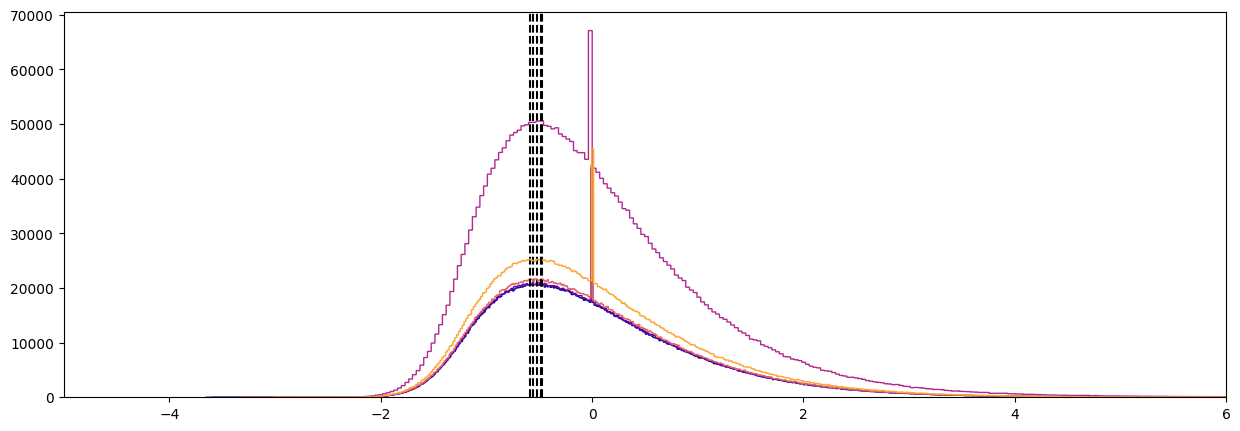

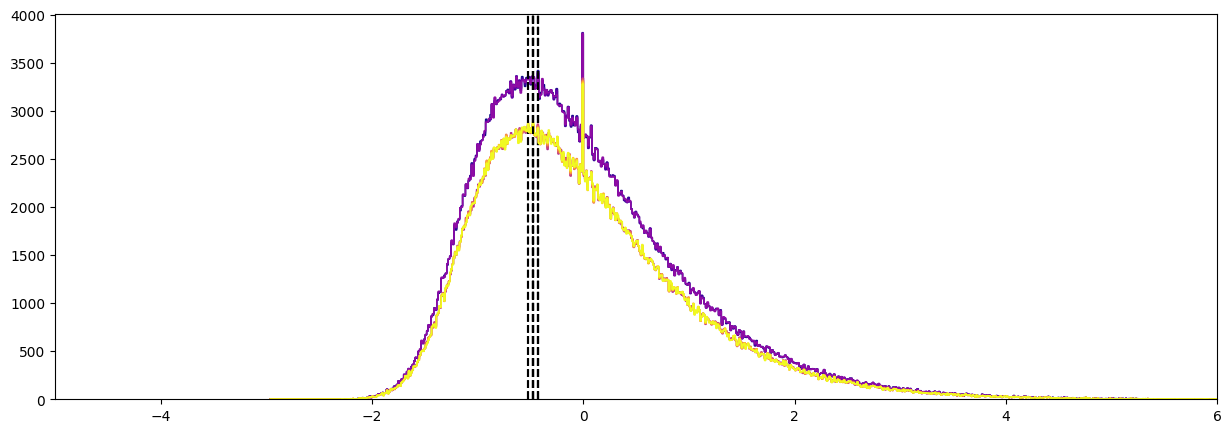

In [99]:
# Define the colormap
cmap = plt.get_cmap('plasma')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,5))

for i in range(5):
    j = np.arange(0, 2500, 500)[i]
    data = wil_bpc[:, j:j+500].flatten()
    counts, bin_edges = np.histogram(data, bins=1000)
    
    # Plot histogram with outline only
    ax.hist(data, bins=1000, histtype='step', color=cmap(i / 5))
    
    # Add a vertical line at the maximum value
    
    max_count_index = np.argsort(counts)[::-1][1]

    # Determine the center of the bin with the maximum count
    peak = (bin_edges[max_count_index] + bin_edges[max_count_index + 1]) / 2

    ax.axvline(peak, color='k', linestyle='dashed')

# Set x-axis limits
ax.set_xlim(-5, 6)
#ax.set_ylim(0,100)

# Show the plot
plt.show()

# Define the colormap
cmap = plt.get_cmap('plasma')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,5))

for i in range(12):
    j = np.arange(0, 6144, 12)[i]
    data = wil_bpc[j:j+512, :1000].flatten()
    counts, bin_edges = np.histogram(data, bins=1000)
    
    # Plot histogram with outline only
    ax.hist(counts, bins=1000, histtype='step', color=cmap(i / 10))
    
    # Add a vertical line at the maximum value
    
    max_count_index = np.argsort(counts)[::-1][1]

    # Determine the center of the bin with the maximum count
    peak = (bin_edges[max_count_index] + bin_edges[max_count_index + 1]) / 2

    ax.axvline(peak, color='k', linestyle='dashed')

# Set x-axis limits
ax.set_xlim(-5, 6)
#ax.set_ylim(0,100)

# Show the plot
plt.show()

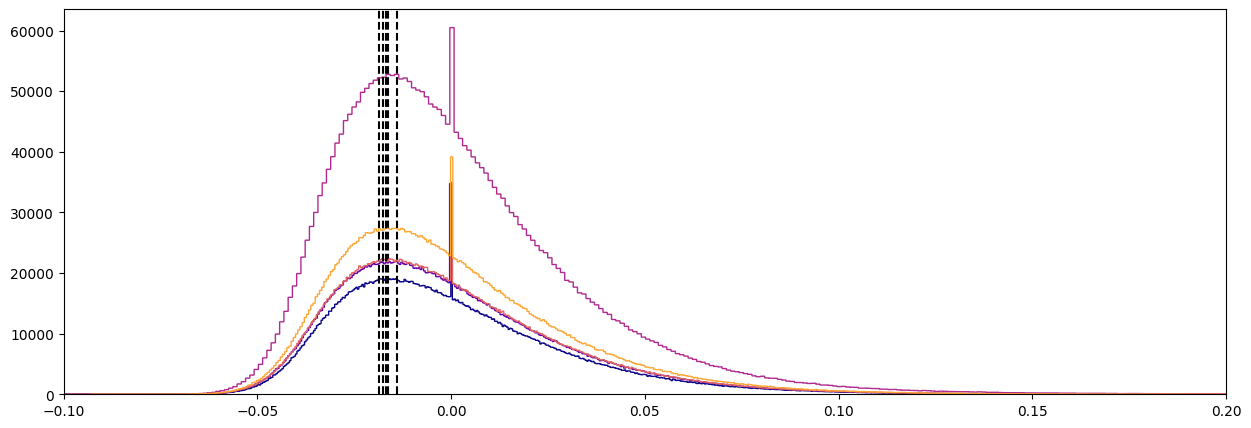

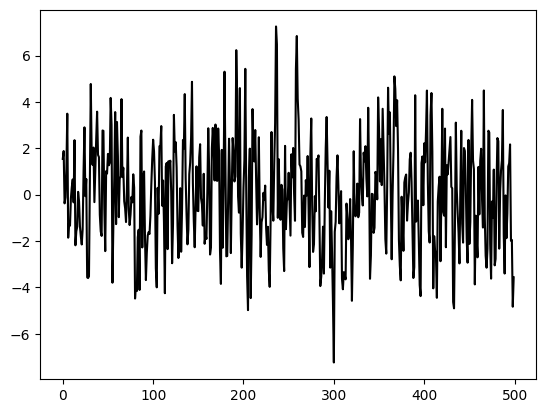

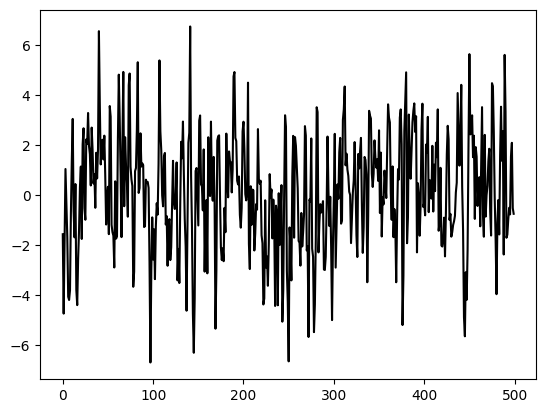

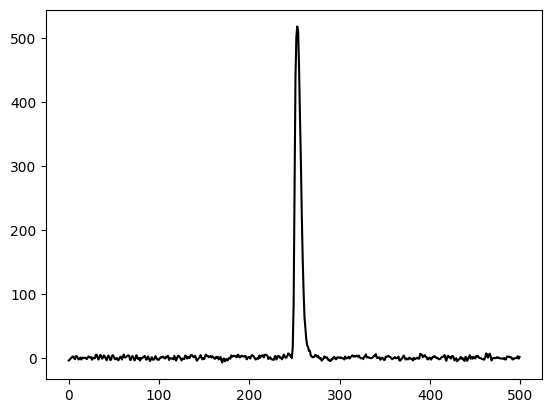

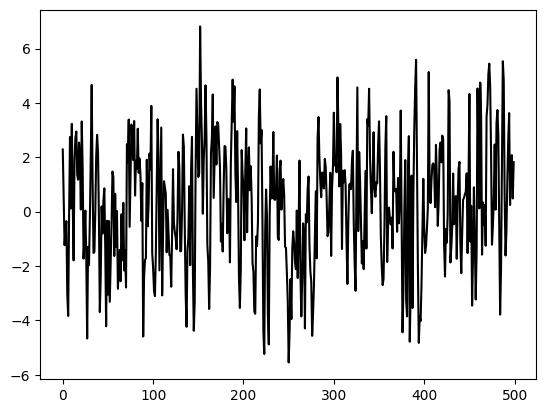

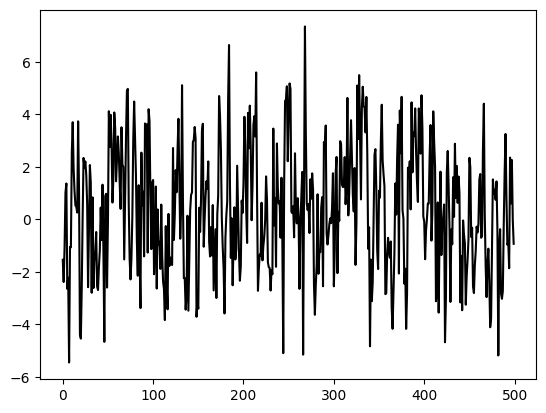

In [68]:
# Define the colormap
cmap = plt.get_cmap('plasma')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,5))

for i in range(5):
    j = np.arange(0, 2500, 500)[i]
    data = wil[:, j:j+500].flatten()
    counts, bin_edges = np.histogram(np.nan_to_num(data), bins=1000)
    
    # Plot histogram with outline only
    ax.hist(data, bins=1000, histtype='step', color=cmap(i / 5))
    
    # Add a vertical line at the maximum value
    
    max_count_index = np.argsort(counts)[::-1][1]

    # Determine the center of the bin with the maximum count
    peak = (bin_edges[max_count_index] + bin_edges[max_count_index + 1]) / 2

    ax.axvline(peak, color='k', linestyle='dashed')

# Set x-axis limits
ax.set_xlim(-0.1, 0.2)

# Show the plot
plt.show()



fig = plt.figure()
for i in np.arange(0,2500,500):
    plt.plot(np.nansum(wil[:, i:i+500],axis=0),c='k')
    plt.show()

In [32]:
print(np.arange(0,2500,250))

[   0  250  500  750 1000 1250 1500 1750 2000 2250]


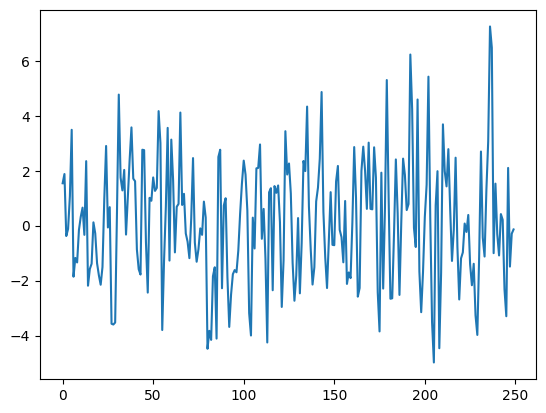

In [27]:
plt.plot(np.nansum(wil[:, 0:250],axis=0))

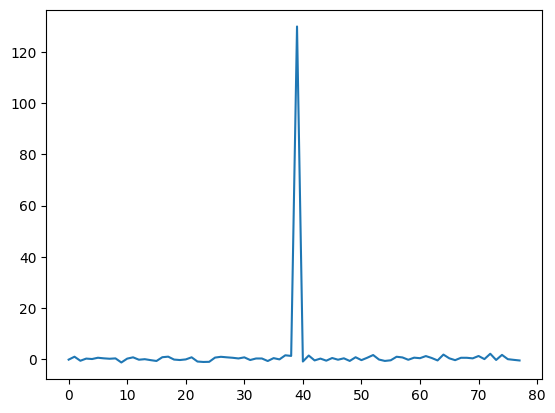

In [21]:
# Import all modules from our new package
import scint_analysis
importlib.reload(scint_analysis)
from scint_analysis import config, core, analysis, plotting

wilhelm = np.load('/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/dsa110-scat/scintillation/scint_analysis/data/wilhelm_dsa_I_602_346_2500b_cntr_bpc.npy')
downsample_factor = 32
prof = np.nansum(wilhelm,axis=0)
n = prof.size - (prof.size % downsample_factor)
prof = prof[:n].reshape(-1, downsample_factor).mean(axis=1)
    
plt.plot(prof)
#plt.xlim(1216, 1347)
plt.show()
                    

In [22]:
# Import all modules from our new package
import scint_analysis
importlib.reload(scint_analysis)
from scint_analysis import config, core, analysis, plotting

# Load the merged configuration from the YAML files
try:
    analysis_config = config.load_config(BURST_CONFIG_PATH)
    # Pretty-print the configuration to verify it
    print("--- Loaded Configuration ---")
    print(json.dumps(analysis_config, indent=2))
except Exception as e:
    logging.error(f"Failed to load configuration: {e}")


INFO: Loading burst configuration from: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/dsa110-scat/scintillation/scint_analysis/configs/bursts/wilhelm.yaml
INFO: Loading telescope configuration from: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/dsa110-scat/scintillation/scint_analysis/configs/bursts/../telescopes/dsa.yaml
INFO: Configurations successfully loaded and merged.


--- Loaded Configuration ---
{
  "telescope_name": "DSA-110",
  "instrument_type": "Multi-Dish Interferometer",
  "native_channel_width_mhz": 0.03051757812,
  "total_bandwidth_mhz": 187.5,
  "num_channels": 6144,
  "min_freq_mhz": 1311.25,
  "max_freq_mhz": 1498.75,
  "burst_id": "wilhelm",
  "input_data_path": "/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/dsa110-scat/scintillation/scint_analysis/data/wilhelm.npz",
  "telescope": "dsa",
  "analysis": {
    "rfi_masking": {
      "find_burst_thres": 5.0,
      "use_symmetric_noise_window": true,
      "rfi_downsample_factor": 16,
      "enable_time_domain_flagging": false,
      "time_threshold_sigma": 7.0,
      "freq_threshold_sigma": 5.0
    },
    "acf": {
      "num_subbands": 4,
      "max_lag_mhz": 45.0,
      "use_snr_subbanding": true
    },
    "fitting": {
      "fit_lagrange_mhz": 45.0,
      "reference_frequency_mhz": 1400.0
    }
  },
  "pipeline_options": {
    "log_level": "INFO",
    "save_intermediate_

INFO: Loading DynamicSpectrum from file: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/dsa110-scat/scintillation/scint_analysis/data/wilhelm.npz
INFO: Initializing DynamicSpectrum object.
INFO: Spectrum shape: (6144, 2500)
INFO: Generating dynamic spectrum plot.


Raw spectrum loaded successfully.
<DynamicSpectrum (6144 channels x 2500 timesteps, 1311.2-1498.8 MHz)>

Displaying raw dynamic spectrum...


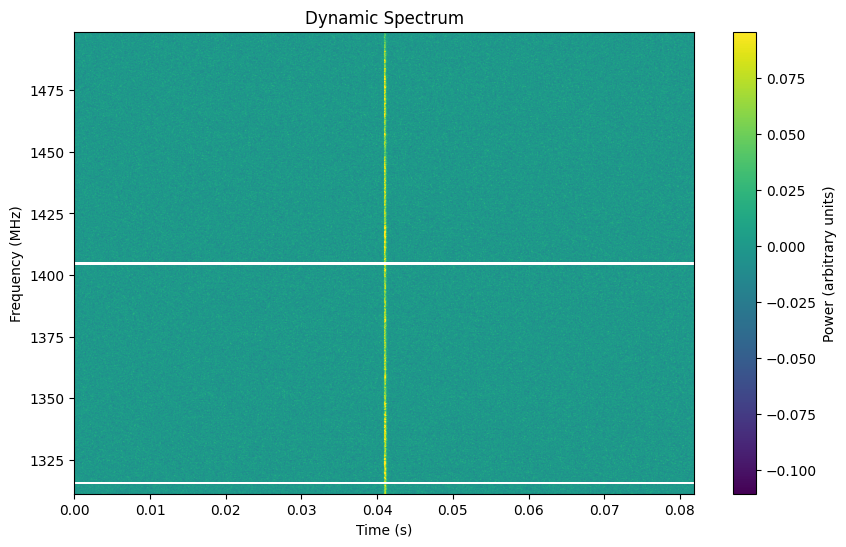

INFO: Applying RFI masking.
INFO: Using time downsampling factor of 16 for RFI statistical checks.
INFO: Efficiently finding burst envelope with S/N threshold > 5.0 (downsample ×8).



Applying RFI masking...
Mask: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True  True  True F

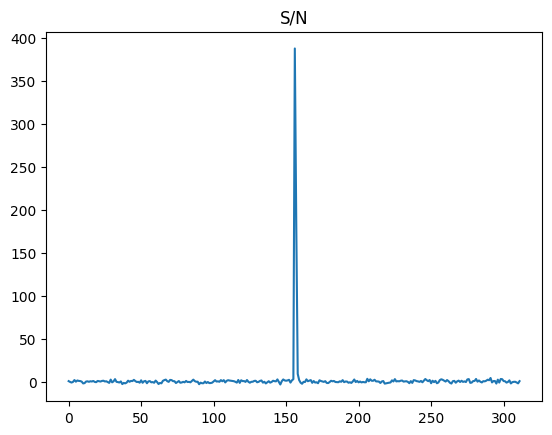

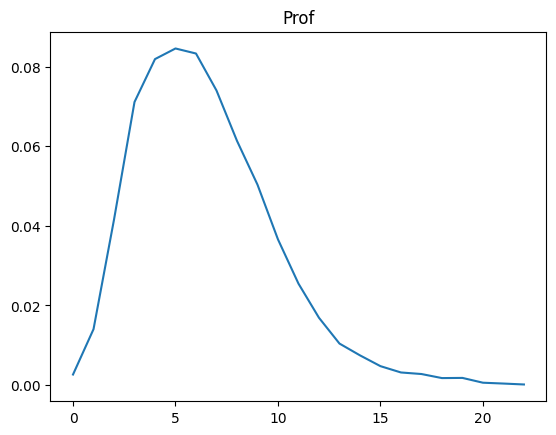

INFO: Burst envelope found between bins 1248 and 1271.
INFO: Using symmetric noise window of duration 23 bins.
INFO: Using downsampled noise statistics from bins 76 to 78.


Prof shape: (312,)
Peak S/N: 387.51979964025475


Iterative RFI Masking in Frequency Domain:  20%|██        | 1/5 [00:00<00:00, 92.94it/s]
INFO: Masked 5 channels based on frequency-domain stats.
INFO: Skipping time-domain RFI flagging as per configuration.
INFO: Initializing DynamicSpectrum object.
INFO: Spectrum shape: (6144, 2500)
INFO: Generating dynamic spectrum plot.


RFI masking complete.

Displaying RFI-masked dynamic spectrum...


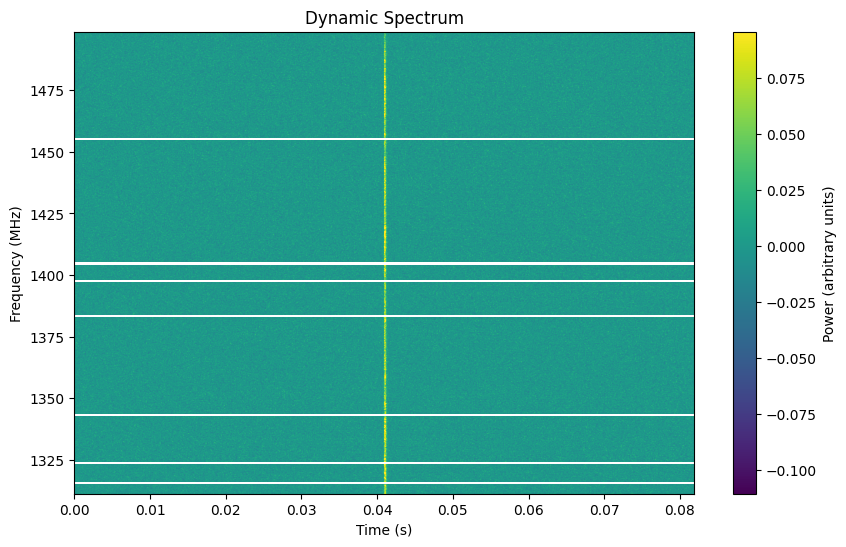

In [23]:
# Import all modules from our new package
import scint_analysis
importlib.reload(scint_analysis)
from scint_analysis import config, core, analysis, plotting
importlib.reload(config)
importlib.reload(core)
importlib.reload(analysis)
importlib.reload(plotting)

# Load the dynamic spectrum from the path specified in the config
try:
    raw_spectrum = core.DynamicSpectrum.from_numpy_file(analysis_config['input_data_path'])
    print("Raw spectrum loaded successfully.")
    print(raw_spectrum)
except Exception as e:
    logging.error(f"Failed to load data: {e}")

# --- Visualization Step 1: Inspect Raw Data ---
if 'raw_spectrum' in locals():
    print("\nDisplaying raw dynamic spectrum...")
    plotting.plot_dynamic_spectrum(raw_spectrum)

# --- Perform RFI Masking ---
if 'raw_spectrum' in locals():
    print("\nApplying RFI masking...")
    masked_spectrum = raw_spectrum.mask_rfi(analysis_config)
    print("RFI masking complete.")

    # --- Visualization Step 2: Inspect Masked Data ---
    print("\nDisplaying RFI-masked dynamic spectrum...")
    plotting.plot_dynamic_spectrum(masked_spectrum)

INFO: Starting sub-band ACF calculations.
INFO: Efficiently finding burst envelope with S/N threshold > 5.0 (downsample ×8).



Calculating ACFs for all sub-bands (this may take a moment)...
Mask: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False

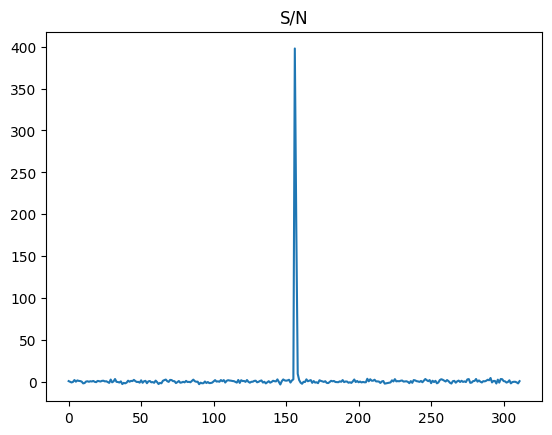

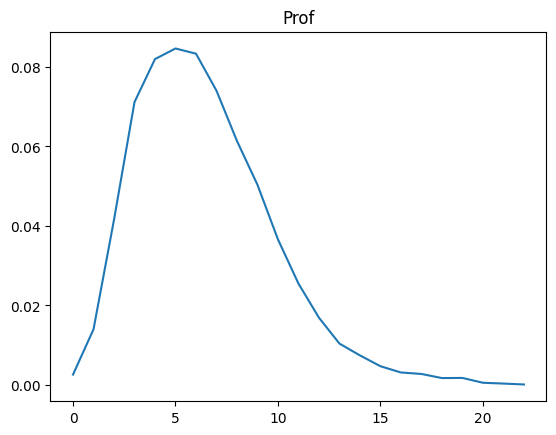

INFO: Burst envelope found between bins 1248 and 1271.


Prof shape: (312,)
Peak S/N: 397.83363414007533


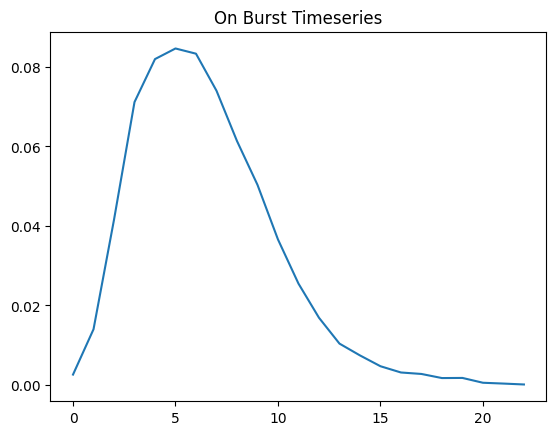

INFO: Using symmetric noise window of duration 23 bins.


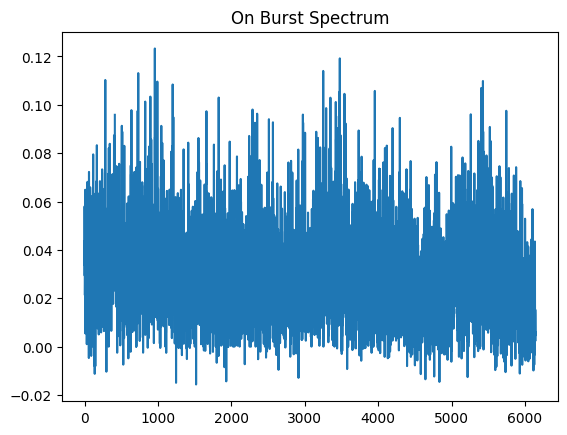

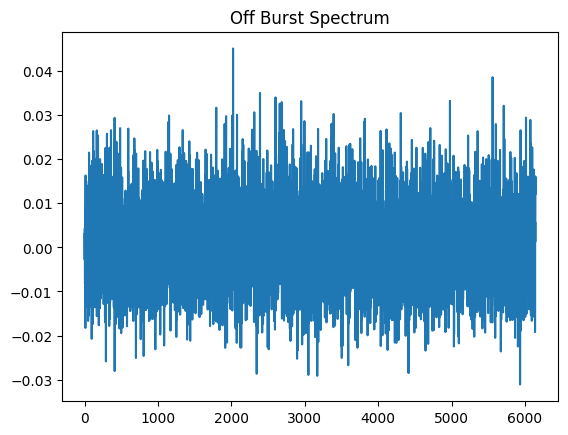

Calculating sub-band ACFs: 100%|██████████| 4/4 [00:00<00:00, 41.65it/s]

ACF calculation complete.

ACF Results Dictionary Keys: dict_keys(['subband_acfs', 'subband_lags_mhz', 'subband_center_freqs_mhz', 'subband_channel_widths_mhz', 'subband_num_channels'])
Computed ACFs for 4 sub-bands.


In [24]:
# Import all modules from our new package
import scint_analysis
importlib.reload(scint_analysis)
from scint_analysis import config, core, analysis, plotting

# --- Calculate ACFs for all sub-bands ---
if 'masked_spectrum' in locals():
    print("\nCalculating ACFs for all sub-bands (this may take a moment)...")
    acf_results = analysis.calculate_acfs_for_subbands(masked_spectrum, analysis_config)
    print("ACF calculation complete.")
    
    # You can inspect the structure of the results
    print("\nACF Results Dictionary Keys:", acf_results.keys())
    print(f"Computed ACFs for {len(acf_results['subband_acfs'])} sub-bands.")


In [25]:
# Import all modules from our new package
import scint_analysis
importlib.reload(scint_analysis)
from scint_analysis import config, core, analysis, plotting

# --- Run the final analysis and fitting stage ---
if 'acf_results' in locals() and acf_results['subband_acfs']:
    print("\nFitting models and deriving final scintillation parameters...")
    # This function returns both the final parameters and the raw lmfit objects
    final_results, all_subband_fits, powlaw_fit_params = analysis.analyze_scintillation_from_acfs(acf_results, analysis_config)
    print("Analysis complete.")

    # --- Inspect the Final Results ---
    print("\n--- Final Derived Parameters ---")
    print(json.dumps(final_results, indent=2))
else:
    logging.error("ACF results not available. Cannot proceed to final analysis.")


INFO: Fitting Lorentzian models to all sub-band ACFs...
INFO: Model selection complete. Best overall model: 1 component(s).



Fitting models and deriving final scintillation parameters...
α = -33.20,  A = -5.86e-09,  residual variance = 74.818
Analysis complete.

--- Final Derived Parameters ---
{
  "best_model": 1,
  "components": {
    "scint_scale": {
      "power_law_fit_report": [
        -5.864115062904729e-09,
        -33.20075158723527
      ],
      "scaling_index": -33.20075158723527,
      "scaling_index_err": 6.118108675065919e+114,
      "bw_at_ref_mhz": -2.0624674777225961e-113,
      "bw_at_ref_mhz_err": 6.015742871270109,
      "subband_measurements": [
        {
          "freq_mhz": 1331.56275435455,
          "bw": 0.21848959896487397,
          "mod": 0.21300298343818547,
          "bw_err": 0.034731452456016214,
          "finite_err": 0.00803877826646339
        },
        {
          "freq_mhz": 1376.8124287807261,
          "bw": 0.895835328042779,
          "mod": 0.11771284179579378,
          "bw_err": 0.25283591977526876,
          "finite_err": 0.0600862254928515
        },
     

INFO: Generating full analysis overview plot.



Generating final analysis overview plot...


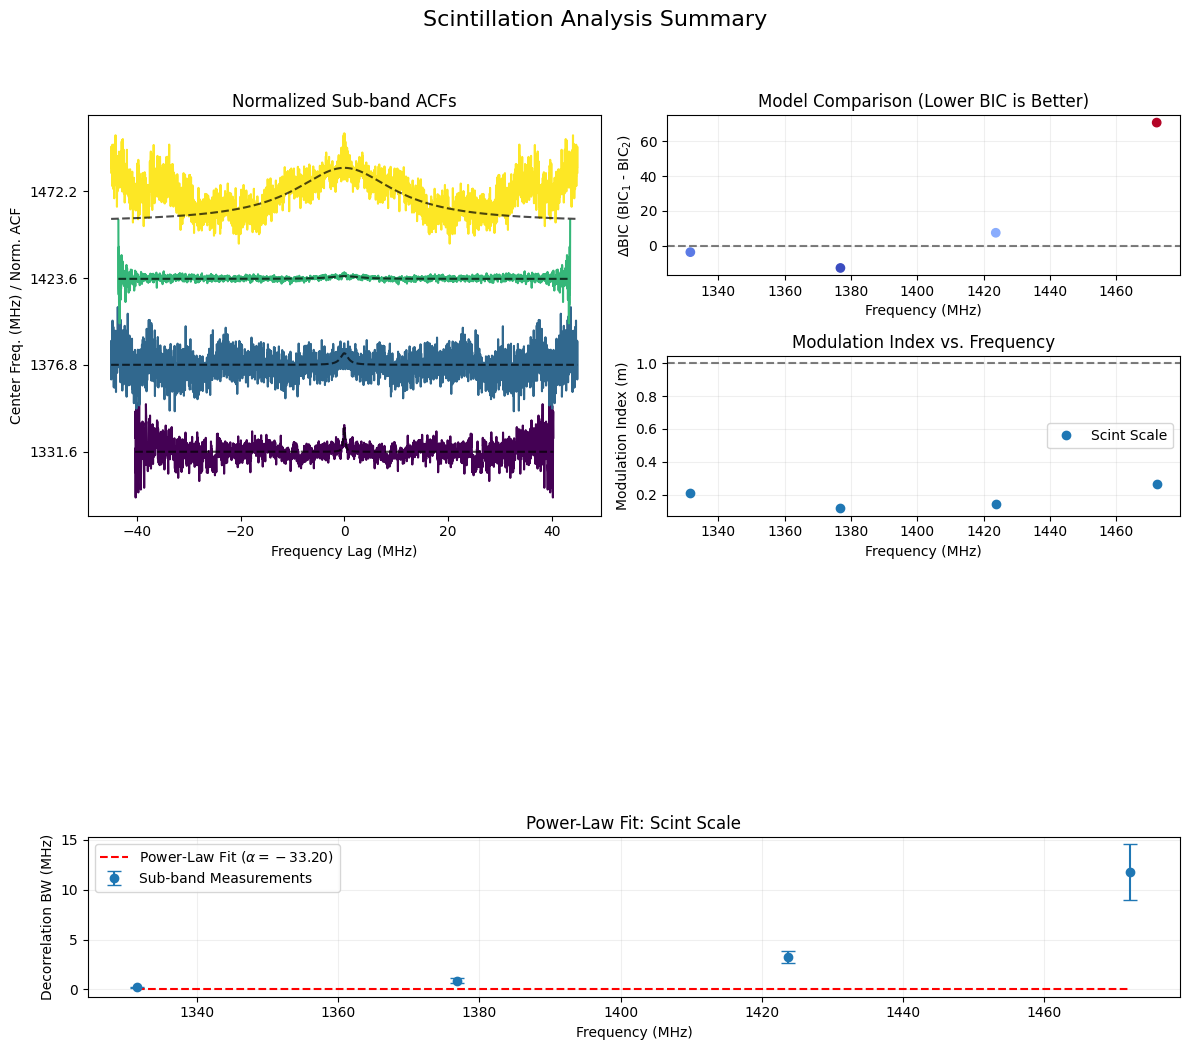

In [29]:
# Import all modules from our new package
import scint_analysis
importlib.reload(scint_analysis)
from scint_analysis import config, core, analysis, plotting
importlib.reload(config)
importlib.reload(core)
importlib.reload(analysis)
importlib.reload(plotting)

# --- Generate the final overview plot ---
if 'final_results' in locals() and 'all_subband_fits' in locals():
    print("\nGenerating final analysis overview plot...")
    plotting.plot_analysis_overview(
        analysis_results=final_results,
        acf_results=acf_results,
        all_subband_fits=all_subband_fits,
        powlaw_fit_params=powlaw_fit_params
    )
else:
    logging.warning("Final results not available, skipping overview plot.")


In [28]:
def power_law_slope(freqs, bws):
    """
    Fit bws = A * freqs^alpha via a log–log linear regression.

    Parameters
    ----------
    freqs : array-like, shape (N,)
        Central frequencies (e.g. in MHz).
    bws : array-like, shape (N,)
        Measured decorrelation bandwidths (same units across all points).

    Returns
    -------
    alpha : float
        Power-law exponent (slope in log–log space).
    A : float
        Normalization constant (value of bws at freqs=1, in bws units).
    r2 : float
        Coefficient of determination of the log–log fit.
    """
    # Convert to NumPy arrays
    freqs = np.asarray(freqs)
    bws   = np.asarray(bws)

    # Take logs (base-10)
    logf = np.log10(freqs)
    logb = np.log10(bws)

    # Fit a line: logb = alpha * logf + logA
    alpha, logA = np.polyfit(logf, logb, 1)

    # Compute R^2 in log–log space
    logb_pred = alpha*logf + logA
    ss_res = np.sum((logb - logb_pred)**2)
    ss_tot = np.sum((logb - np.mean(logb))**2)
    r2     = 1 - ss_res/ss_tot

    # Convert normalization back from log
    A = 10**logA

    return alpha, A, r2

freqs = [600., 1331,1376.9295946605891, 1423.2097916327527, 1472.845922187856]
bws = [0.25, 0.4184896, 0.8958340, 3.244896982320, 11.7]

from scipy.odr import RealData, Model, ODR
import numpy as np

# Define power-law model: b = A * nu**alpha
def f(B, x):
    return B[0] * x**B[1]

model   = Model(f)
data    = RealData(freqs, bws)
odr     = ODR(data, model, beta0=[1e-8, 4.0])   # initial guess [A, alpha]
out     = odr.run()

A_fit, alpha_fit = out.beta
print(f"α = {alpha_fit:.2f},  A = {A_fit:.3g},  residual variance = {out.res_var:.3f}")

α = 5.37,  A = 5.59e-17,  residual variance = 18.577
